[View in Colaboratory](https://colab.research.google.com/github/bruAristimunha/MAC0459/blob/master/DataScienceEP1.ipynb)

## Indentificação de todos os membros do grupo

Name: Daniel Martinez

Name: Bruno Aristimunha

## Name of the dataset
Dataset: Drug consumption (quantified) Data Set

# Motivo para escolha do conjunto de dados

O conjunto de dados possui um sólido estudo de ciência de dados, [récem públicado](http://www.math.le.ac.uk/people/ag153/homepage/FehrmanEtAl2017inbook.pdf). Os dados também não possuem valores faltantes ou categorização ambígua. O estudo de categorização sobre o consumo de drogas é suma importante para redução de danos e melhor entendimento da 
dinâmica presente com as substâncias, licitas e ilícitas.

## Resumo

Esse *dataset* contém informações do consumo de 18 drogas psicoativas que atuam no sistema nervoso central, sobre o qual uma pesquisa exaustiva foi feita para selecionar o sub conjunto mais efetivo das características de entrada e métodos de mineração de dados.

## Questões para o Conjunto de Dados

Nós levantamos quatro perguntas para esse conjunto de dados, sendo elas:

- Questão 1: Quais as possíveis relações entre o consumo de diferentes tipos de drogas?

- Questão 2: Como o uso de diferentes tipos de drogas explica a personalidade do usuário? E o oposto?

- Questão 3: O consumo de drogas está relacionado ao IDH (ou outros identificadores) do país do usuário? (dado não disponível)

- Questão 4: Há agrupamentos de escolaridade nos dados de personalidade?



# Análise Exploratória de Dados

Tentamos verificar os agrupamentos presentes por algoritmos de clusterização (exemplo: K-Means, PCA ou dendrograma) para descobrir os agrupamentos por escolaridade. 

Para as perguntas relacionadas as correlações, usaremos, além da correlação de Pearson, algumas variedades de métodos semelhantes para verificar o comportamento das distribuições. Em função da exploração de dados, usaremos as abordagens necessárias para os métodos de classificação.

In [0]:
import pandas as pd
import seaborn as se
import numpy as np
import sklearn as sk
import matplotlib.pylab as plt

#!apt-get -qq install python-geopandas python3-geopandas
#import geopandas as gpd (falhou...)


from scipy.cluster.hierarchy import dendrogram, linkage
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import precision_score

# Obtendo o conjunto de dados e realizando re-padronizações 
 - Transformando atributos numéricos em categóricos
     - Para tanto, houve a leitura do artigo públicado e a descrição dos dados disponível no site
     

In [2]:
drugs = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data",header=None)

drugs.columns = columns = ['id','Idade','Genero','Educação','País','Etnia','Neuroticismo','Extroversao','Abertura','Amabilidade','Consciencia','Impulsividade','Sensacao','Álcool','Nitrito de amila','Amilo','Benzos','Café','Cannabis','Chocolate','Cocaina','Crack','Êxtase','Heroína','Ketamina','Legalh','LSD','Metanfetamina','Cogumelos','Nicotina','Semer','VSA']

#print(drugs.info())
drugs_copy = drugs.copy()


drugs.T.head(32)



,0,1,2,3,4,5,6,7,8,9,...,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884
id,1,2,3,4,5,6,7,8,9,10,...,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888
Idade,0.49788,-0.07854,0.49788,-0.95197,0.49788,2.59171,1.09449,0.49788,0.49788,1.82213,...,-0.95197,-0.07854,-0.95197,-0.95197,-0.95197,-0.95197,-0.95197,-0.07854,-0.95197,-0.95197
Genero,0.48246,-0.48246,-0.48246,0.48246,0.48246,0.48246,-0.48246,-0.48246,0.48246,-0.48246,...,-0.48246,-0.48246,-0.48246,-0.48246,-0.48246,0.48246,-0.48246,0.48246,0.48246,-0.48246
Educação,-0.05921,1.98437,-0.05921,1.16365,1.98437,-1.22751,1.16365,-1.7379,-0.05921,1.16365,...,-0.61113,-0.61113,-1.43719,0.45468,-0.61113,-0.61113,-0.61113,0.45468,-0.61113,-0.61113
País,0.96082,0.96082,0.96082,0.96082,0.96082,0.24923,-0.57009,0.96082,0.24923,0.96082,...,-0.57009,0.24923,-0.57009,0.24923,-0.28519,-0.57009,-0.57009,-0.57009,-0.57009,0.21128
Etnia,0.126,-0.31685,-0.31685,-0.31685,-0.31685,-0.31685,-0.31685,-0.31685,-0.31685,-0.31685,...,0.126,0.1144,-0.31685,-0.31685,-0.31685,-0.31685,-0.31685,-0.31685,-0.31685,-0.31685
Neuroticismo,0.31287,-0.67825,-0.46725,-0.14882,0.73545,-0.67825,-0.46725,-1.32828,0.62967,-0.24649,...,-0.05188,-0.14882,1.49158,-0.05188,-0.79151,-1.1943,-0.24649,1.13281,0.91093,-0.46725
Extroversao,-0.57545,1.93886,0.80523,-0.80615,-1.6334,-0.30033,-1.09207,1.93886,2.57309,0.00332,...,-1.7625,-0.57545,-1.92173,-1.7625,0.32197,1.74091,1.74091,-1.37639,-1.92173,2.127
Abertura,-0.58331,1.43533,-0.84732,-0.01928,-0.45174,-1.55521,-0.45174,-0.84732,-0.97631,-1.42424,...,0.58331,1.43533,-0.58331,0.88309,0.29338,1.88511,0.58331,-1.27553,0.29338,1.65653
Amabilidade,-0.91699,0.76096,-1.6209,0.59042,-0.30172,2.03972,-0.30172,-0.30172,0.76096,0.59042,...,-0.76096,-0.91699,-1.772,-0.76096,-0.30172,0.76096,0.76096,-1.772,-1.6209,1.11406


Não preservamos o id, pois entendemos que tal controle já é feito pelo pandas DataFrame.

Observamos que temos 12 atributos numéricos, e 19 dados categóricos. Os atributos estão completos em todos os objetos (sem valores faltantes)

Dos 12 atributos numéricos, os seguintes itens correspondem as categorias:
 - 2 = Idade
 - 3 = Genero
 - 4 = Educação (Real)
 - 5 = País
 - 6 = Etnia

In [0]:
drugs['Idade']  = drugs['Idade'].astype('category')
drugs['Genero'] = drugs['Genero'].astype('category')
drugs['Educação'] = drugs['Educação'].astype('category')
drugs['País'] = drugs['País'].astype('category')
drugs['Etnia'] = drugs['Etnia'].astype('category')
drugs = drugs.drop('id',1)


Verificando se a transformação nos dados ocorreu de forma esperada (leia: tentamos isso algumas vezes)

In [4]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 31 columns):
Idade               1885 non-null category
Genero              1885 non-null category
Educação            1885 non-null category
País                1885 non-null category
Etnia               1885 non-null category
Neuroticismo        1885 non-null float64
Extroversao         1885 non-null float64
Abertura            1885 non-null float64
Amabilidade         1885 non-null float64
Consciencia         1885 non-null float64
Impulsividade       1885 non-null float64
Sensacao            1885 non-null float64
Álcool              1885 non-null object
Nitrito de amila    1885 non-null object
Amilo               1885 non-null object
Benzos              1885 non-null object
Café                1885 non-null object
Cannabis            1885 non-null object
Chocolate           1885 non-null object
Cocaina             1885 non-null object
Crack               1885 non-null object
Êxtase         

## Consultando o Material de Origem temos o que cada pergunta significa


In [0]:
perguntas = ("Álcool","Anfit","Amilo","Benzos","Café","Cannabis","Chocolate","Cocaina","Crack","Êxtase","Heroína","Ketamina","Legalh","LSD","Metanfetamina","Cogumelos","Nicotina","Semer","VSA")

## Detalhes dos Dados
-  O que significam os atributos não numéricos?


![imagem](https://github.com/bruAristimunha/MAC0459/raw/master/diagrama.png)

### Figura 1: Digrama relacionado à classificação, temos uma sobreposição entre o uso das drogas.

Se a pessoa uso a droga no último dia, ela usou também na última semana, no último mês e sucessivamente. Dessa forma, surge somente duas novas categorias independentes, simplificadas pela autora, como não usuária e usuária. Essa informação está disponível apenas com a leitura do artigo. Traduzido de [The Five Factor Model of Personality and Evaluation of Drug Consumption Risk
](http://www.math.le.ac.uk/people/ag153/homepage/FehrmanEtAl2017inbook.pdf).

---

Por siglas como serão usadas no restante da análise:

	- CL0 = Never Used;
    
	- CL1 = Used over a Decade Ago;
	
    - CL2 = Used in Last Decade;
	
    - CL3 = Used in Last Year;
	
    - CL4 = Used in Last Month;
	
    - CL5 = Used in Last Week;
	
    - CL6 = Used in Last Day;

## Visualizando de forma gráfica, temos a quantidade por categoria relacionado ao uso de drogas


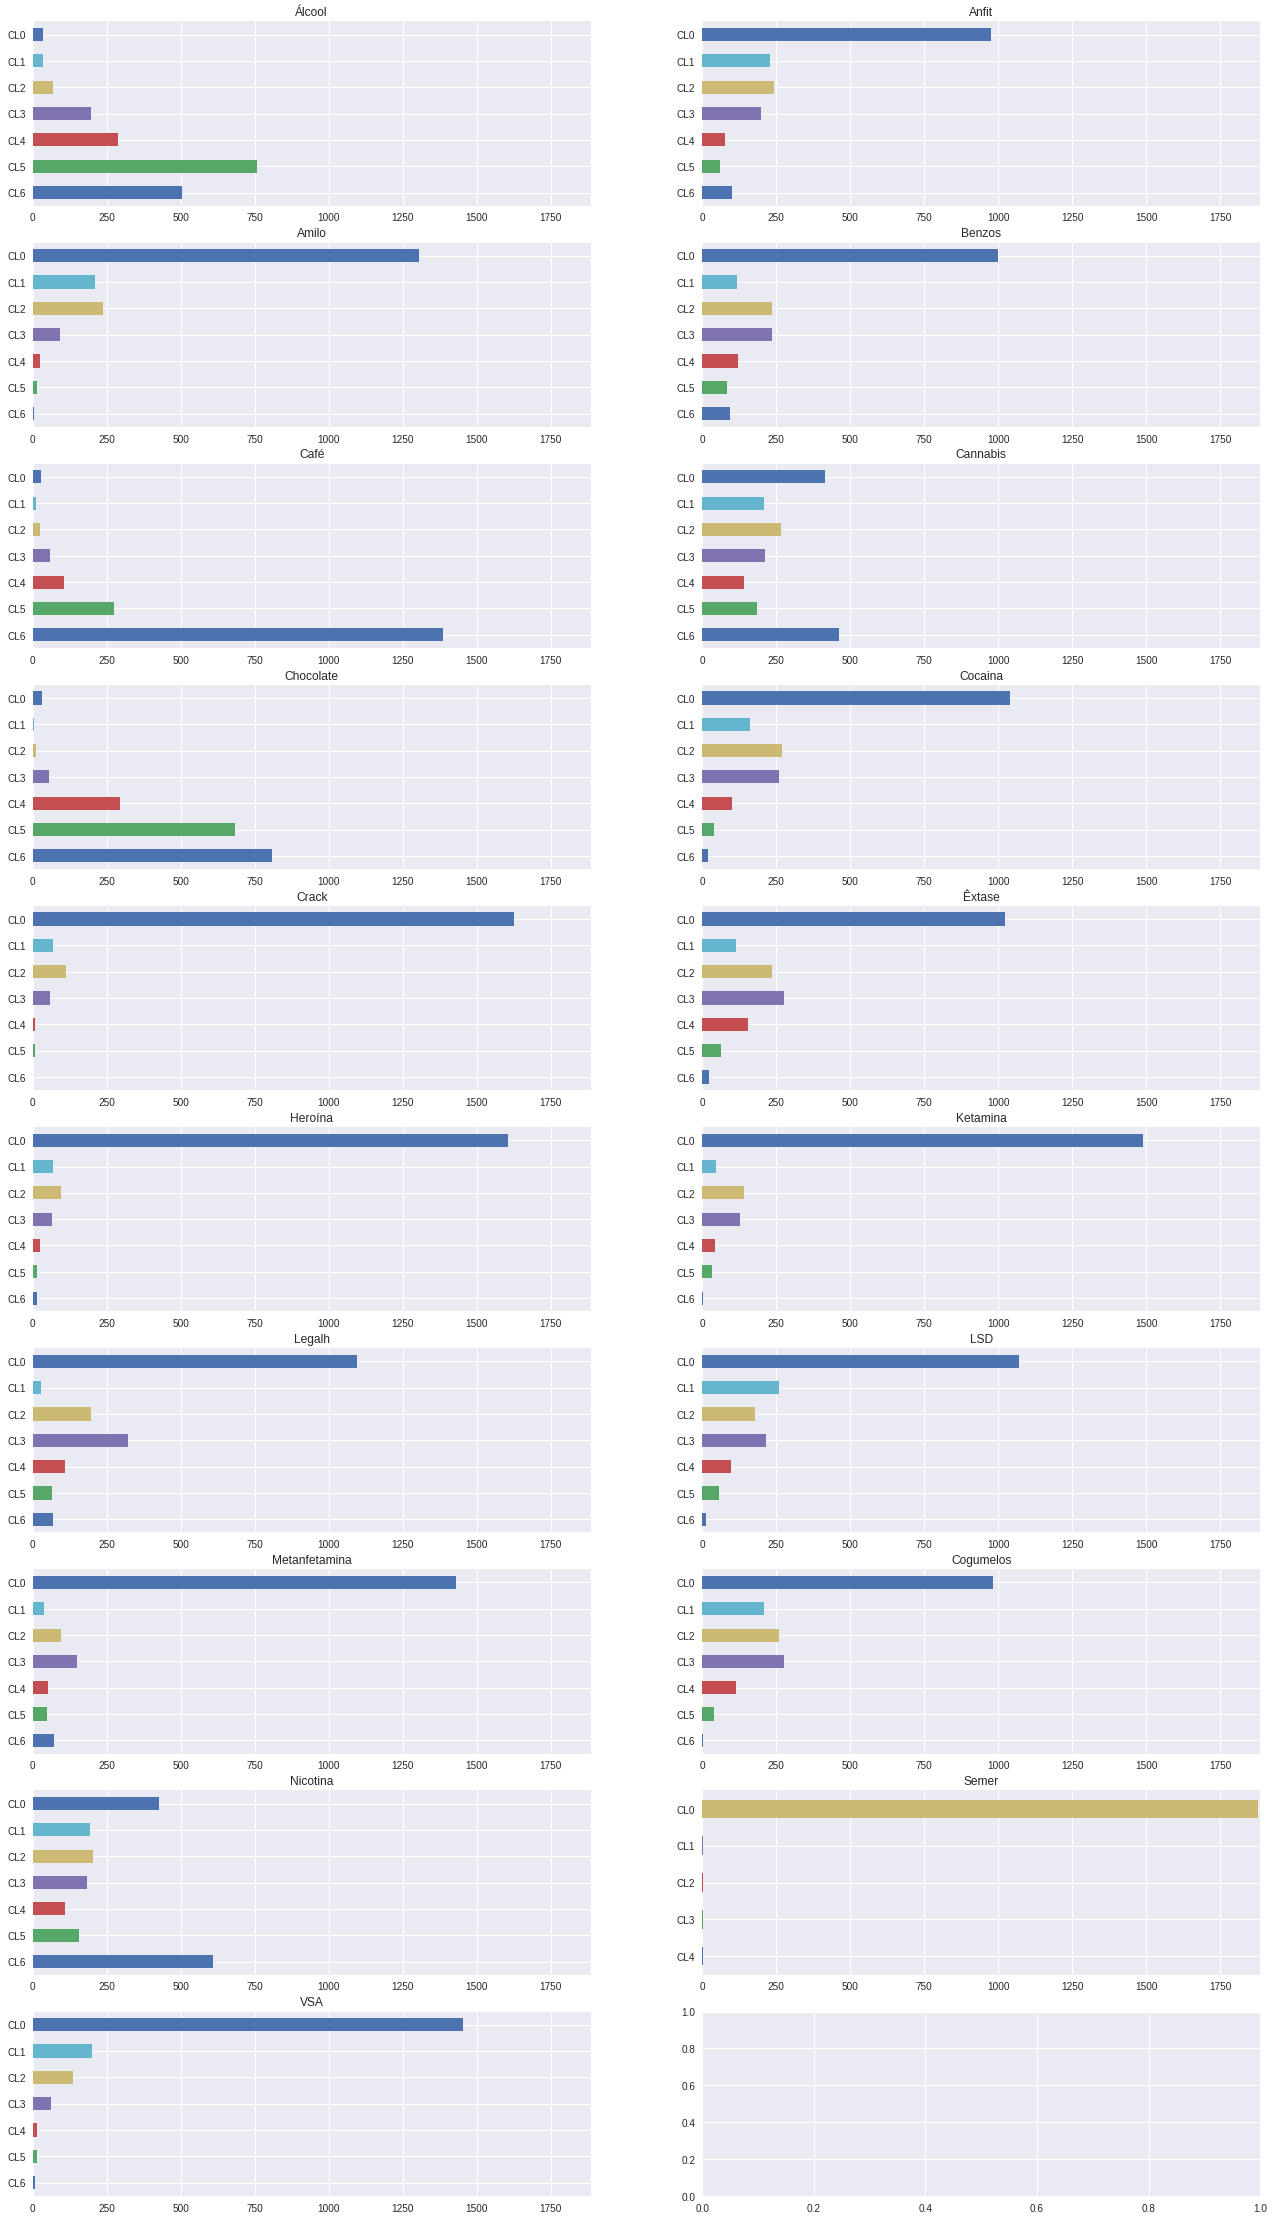

In [6]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(22, 40))

for indice, columns in enumerate(drugs.select_dtypes(include='object')):
    
    drugs[columns].value_counts().sort_index(ascending=False).plot.barh(ax=axes[int(indice/2), indice%2],xlim=(0,len(drugs)), title=perguntas[indice])

# Já é possível constatar informações importantes, como a inexistência de pessoas consumindo Semer.

> Consultando o artigo, verificamos que essa foi uma droga fictícia criada pela autora para avaliar a qualidade das respostas. Partindo da hipótese de que se a pessoa responder que já consumiu uma droga fictícia, logo, mentira. O artigo deixa entendido que havia um número maior de entrevistados (> 1885), mas um processamento com essa pergunta falta removeu os mentirosos.


## Dessa forma, não há riscos de remover essa droga fantasia da análise.

In [0]:
drugs = drugs.drop("Semer",1)

Da descrição do conjunto de dados, buscamos o significado de cada valor numérico adotado, como por exemplo para representar quais foram os valores para cada país. Para interpretação de todas as colunas categóricas é necessário a mesma abordagem.

Tentamos experimentalmente realizar uma plotagem por países, observamos dificuldade em realizar esse agrupamento. Após um longo período de experimentação com matlibplot.pylab. Obtamos pode curiosidade nos mater na primeira  visualização. Como o processamento dessa informação não requer um algoritmo desenvolvido nesse jupyter, pode-se salvar o resultado e observar em outra plataforma somente de visualização (exemplo: tableau)

## Realizando a conversão dos países para valores de String para processamento

In [0]:
drugs['País_cat'] = drugs['País'].copy()
drugs['País_cat'] = drugs['País_cat'].replace(0.24923,"Canada")
drugs['País_cat'] = drugs['País_cat'].replace(-0.46841000000000005,"New Zealand")
drugs['País_cat'] = drugs['País_cat'].replace(0.21128000000000002,"Republic of Ireland")
drugs['País_cat'] = drugs['País_cat'].replace(0.9608200000000001,"UK")
drugs['País_cat'] = drugs['País_cat'].replace(-0.09765, "Australia")
drugs['País_cat'] = drugs['País_cat'].replace(-0.57009, "EUA")
drugs['País_cat'] = drugs['País_cat'].replace(-0.28519, "Outros")
drugs['País_cat'] = drugs['País_cat'].astype('category')

drugs_copy_01 = drugs.copy()
drugs = drugs.drop("País",1)

Realizando a categorização por países:

In [0]:
perguntas = ("Álcool","Anfit","Amilo","Benzos","Café","Cannabis","Chocolate","Cocaina","Crack","Êxtase","Heroína","Ketamina","Legalh","LSD","Metanfetamina","Cogumelos","Nicotina","VSA")

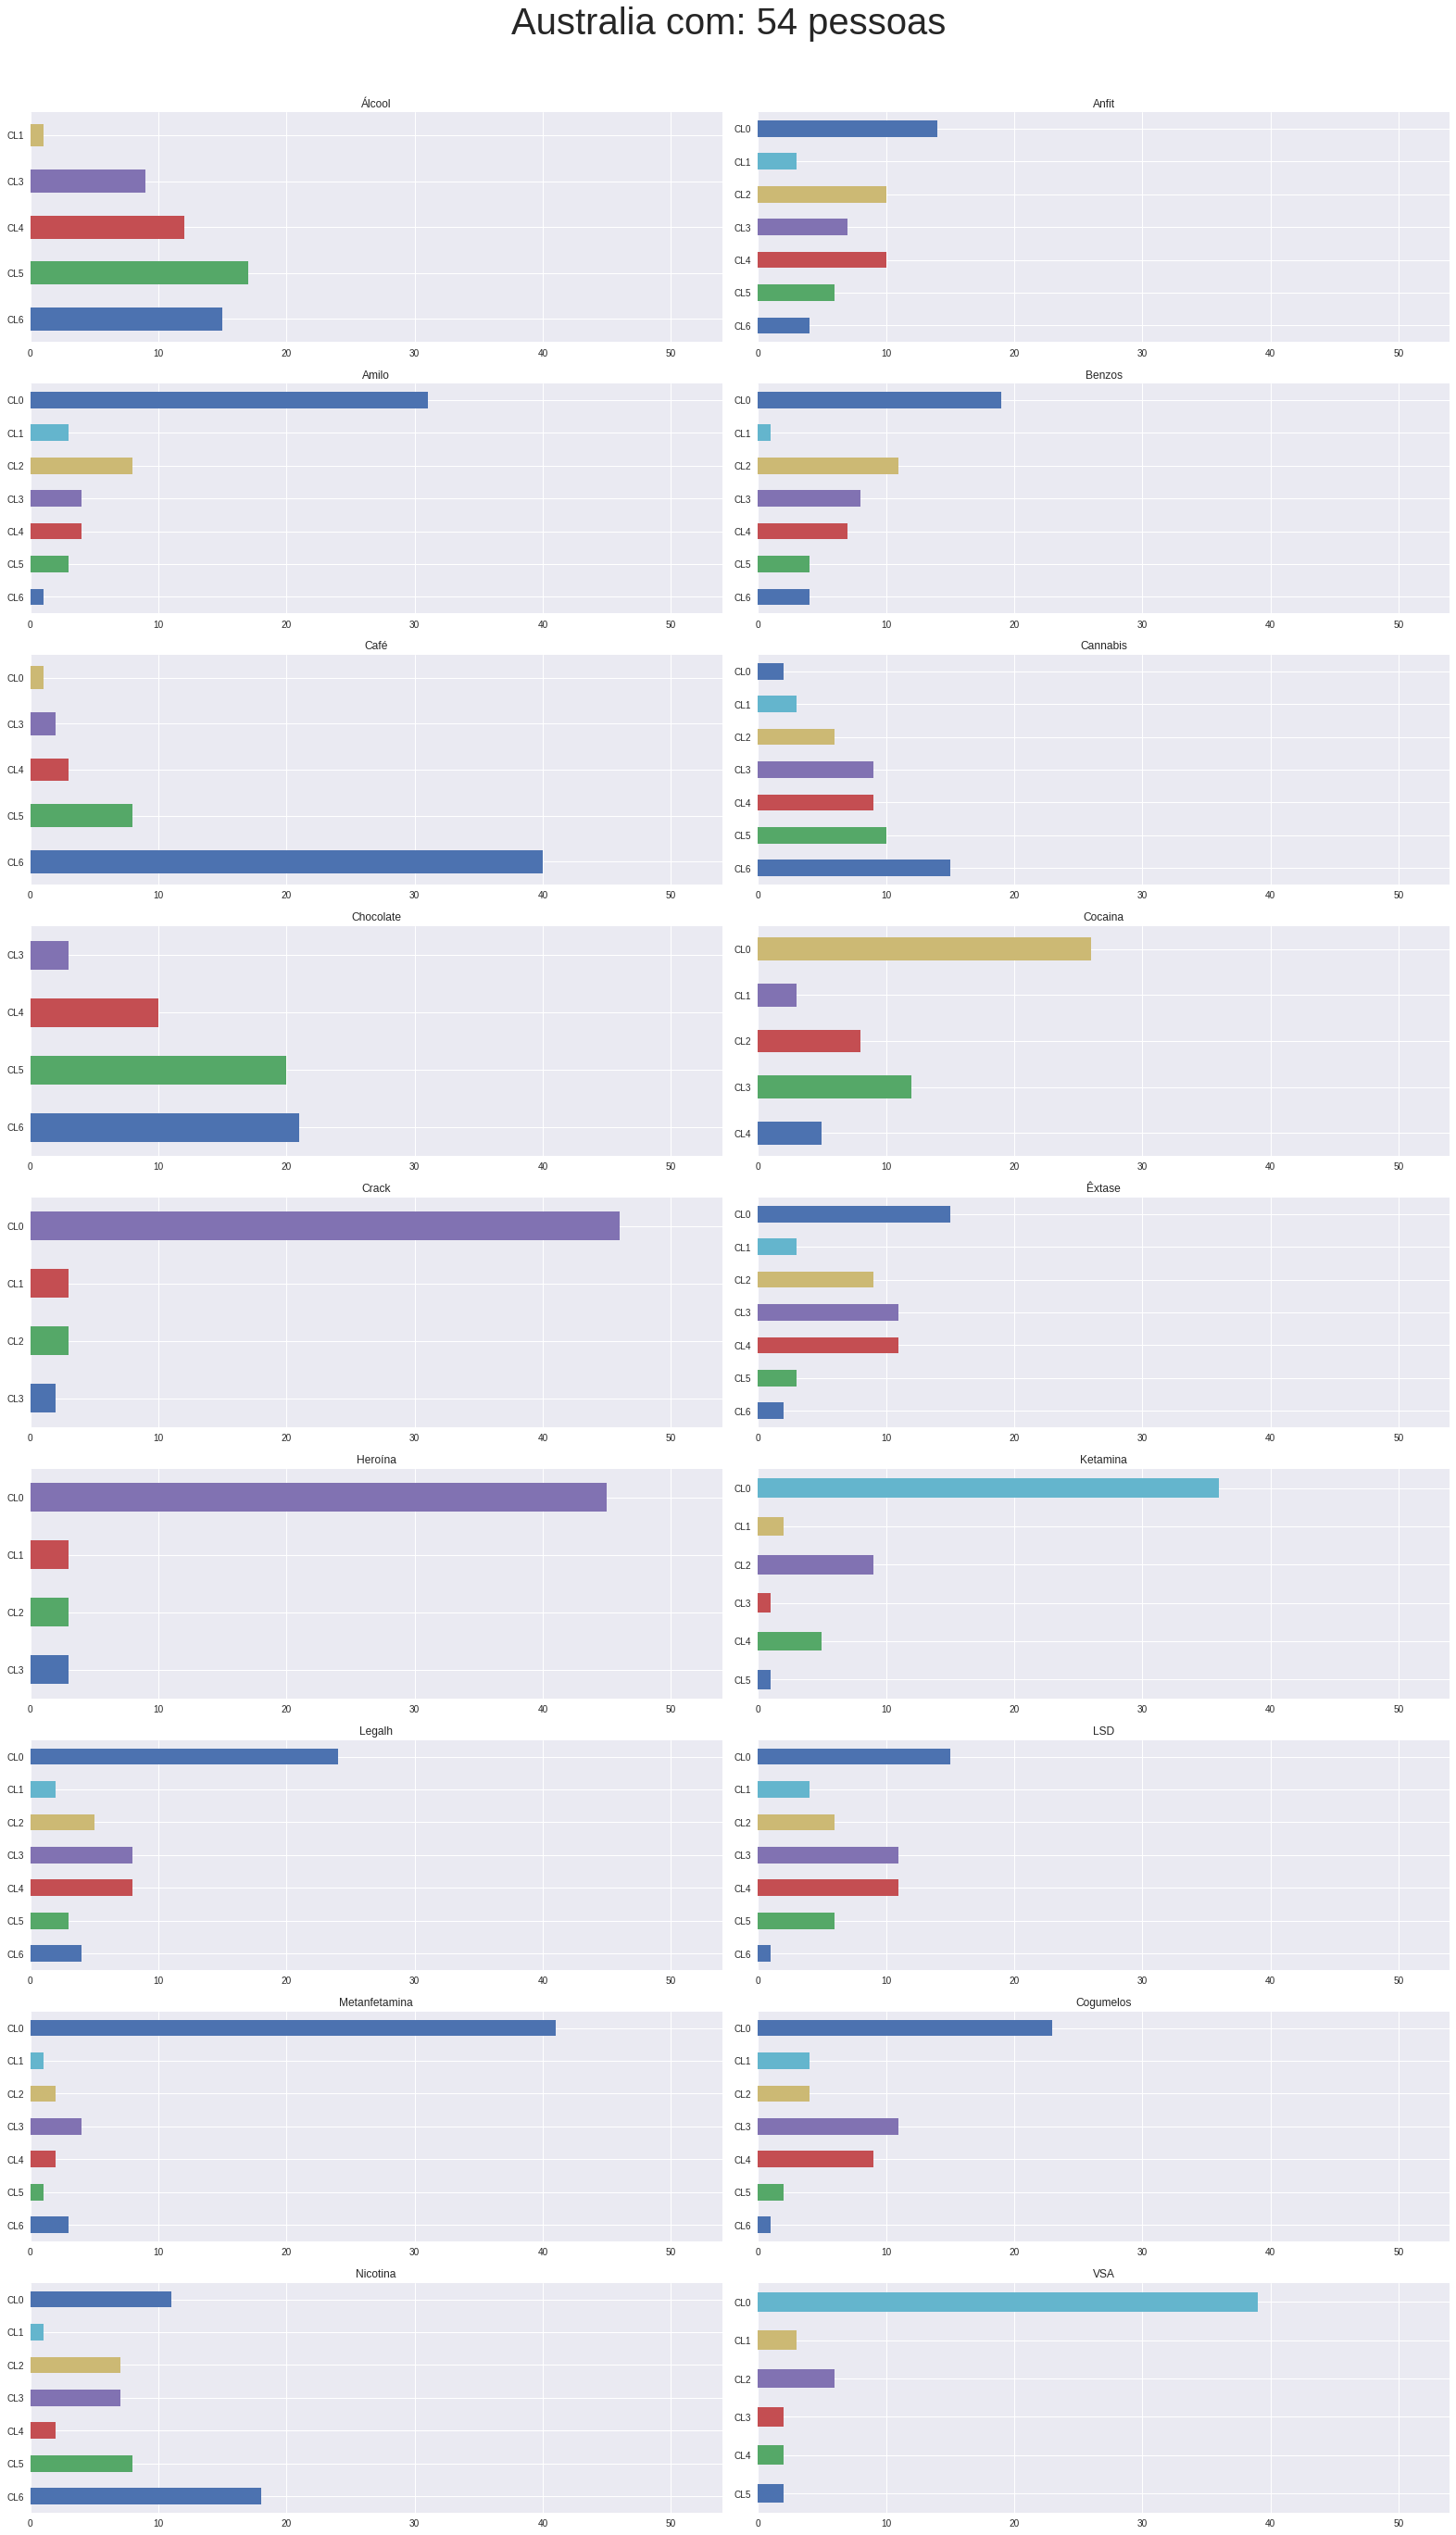

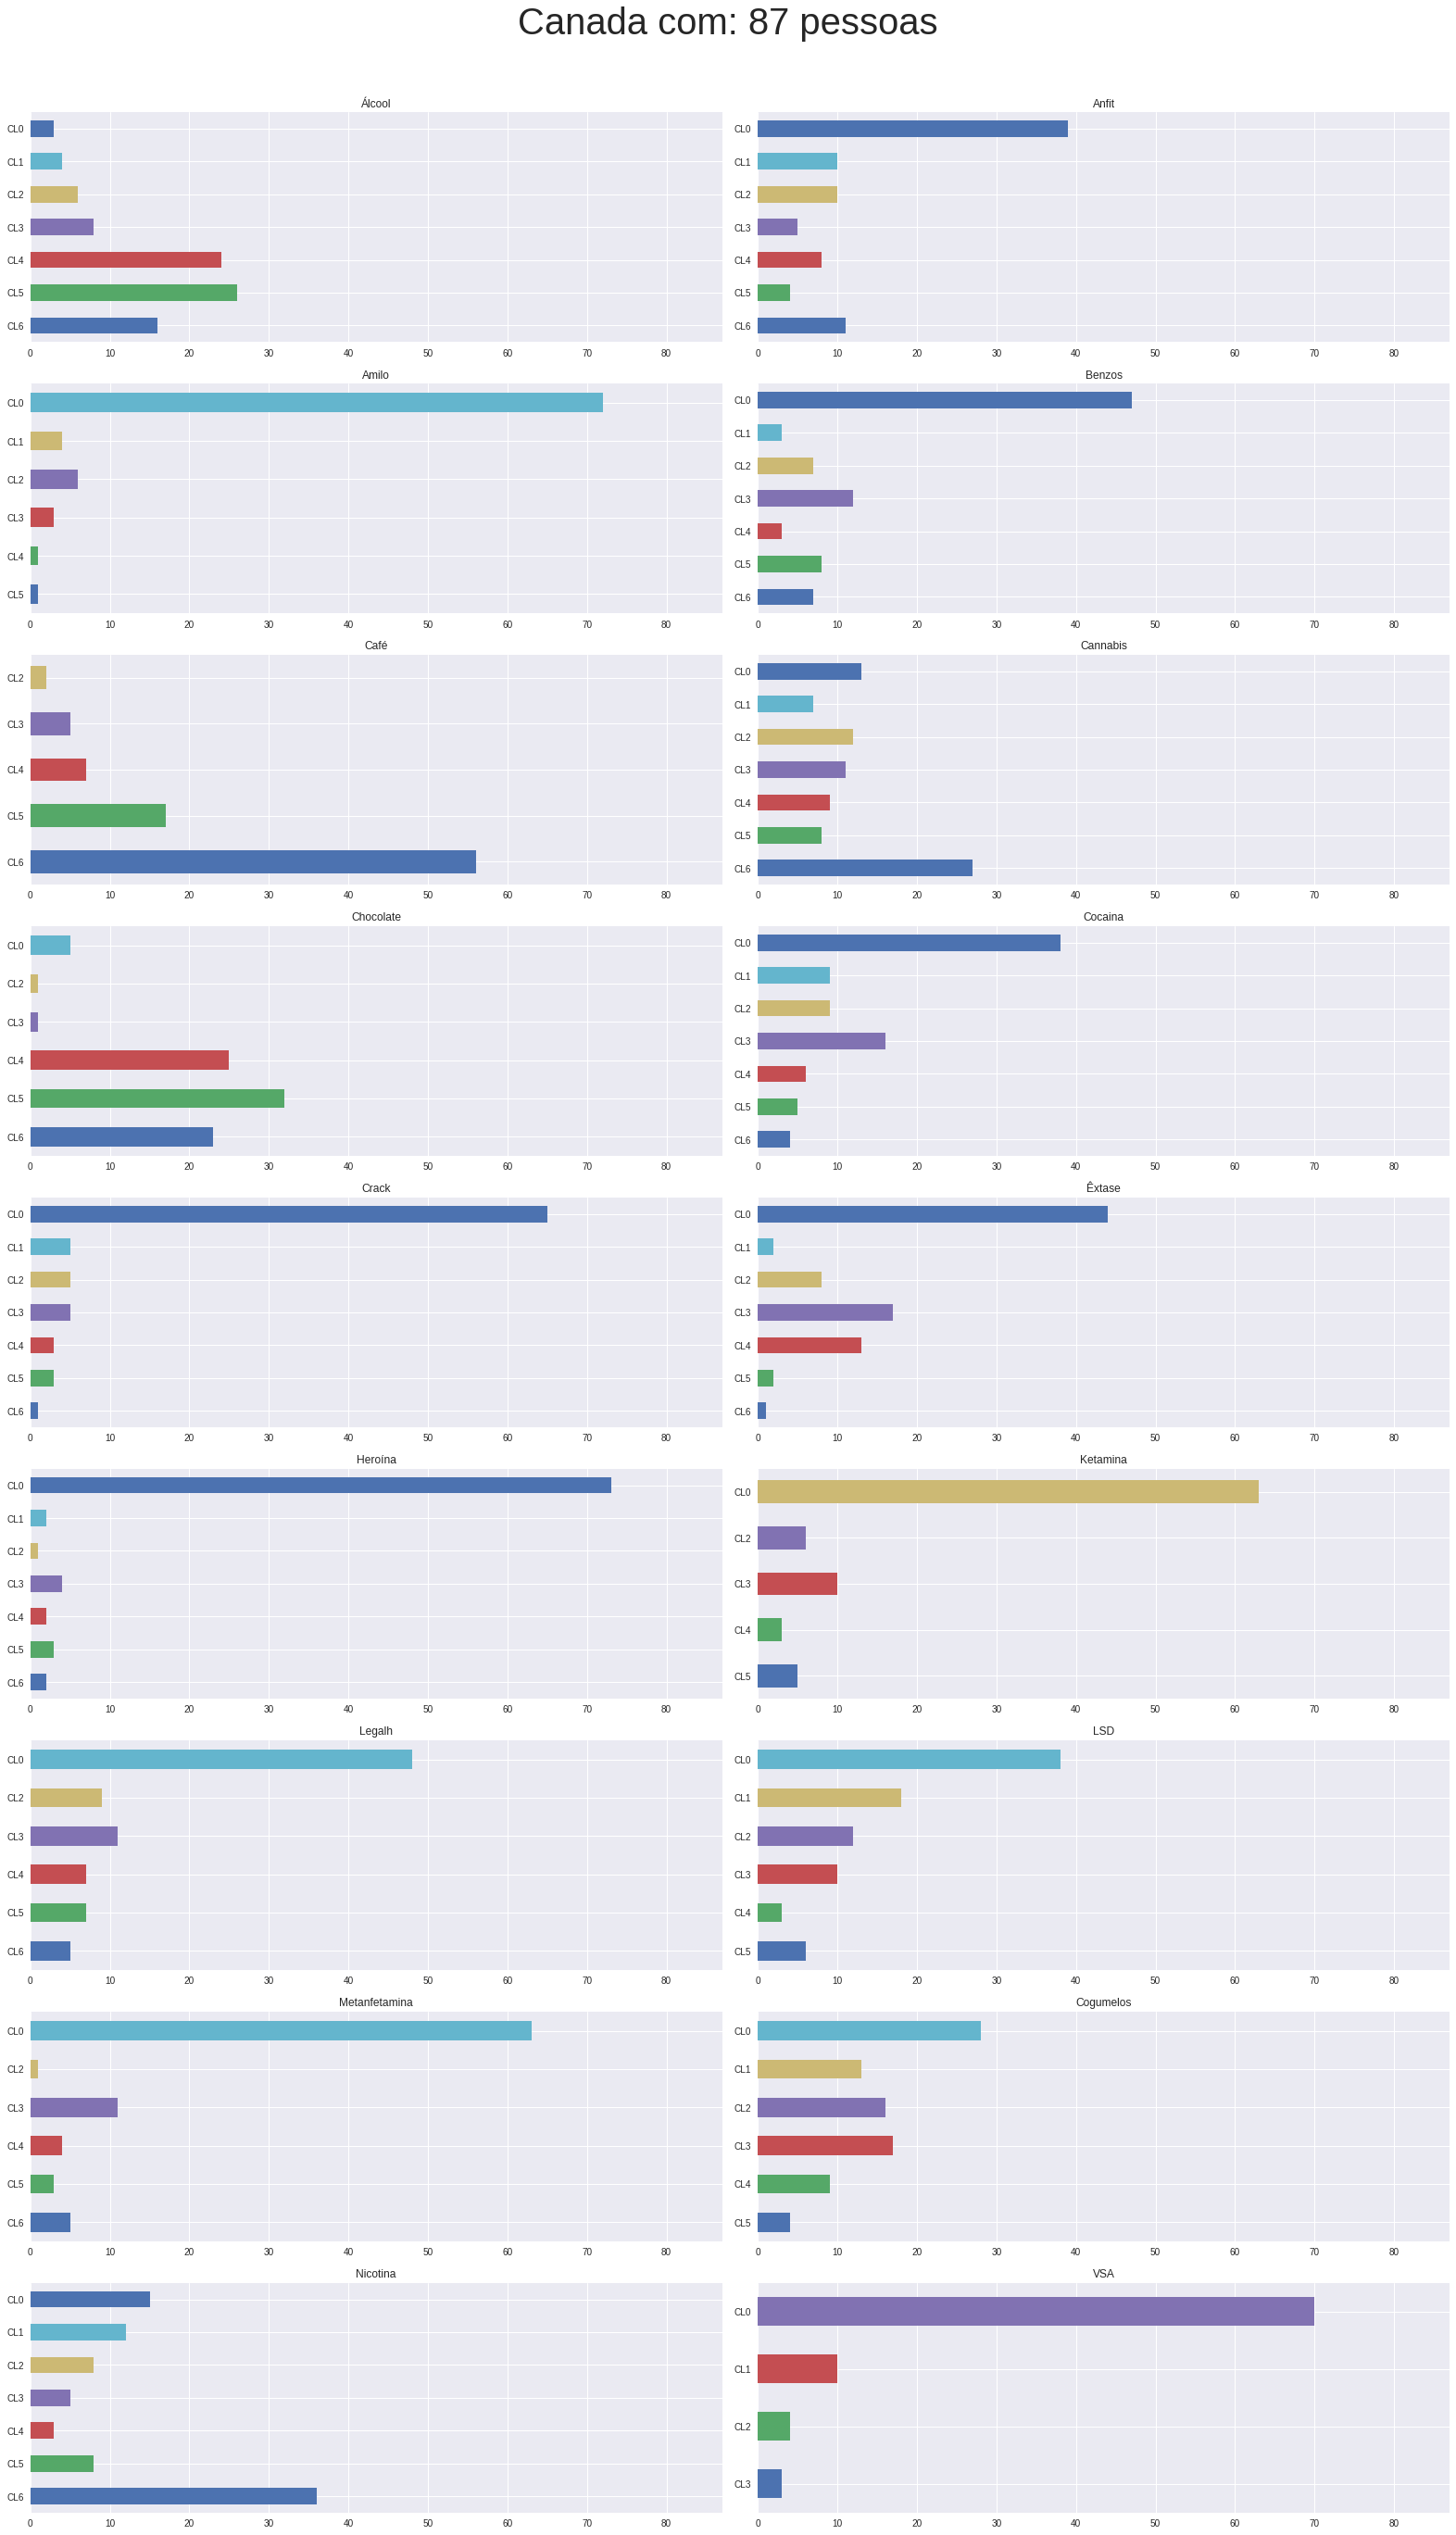

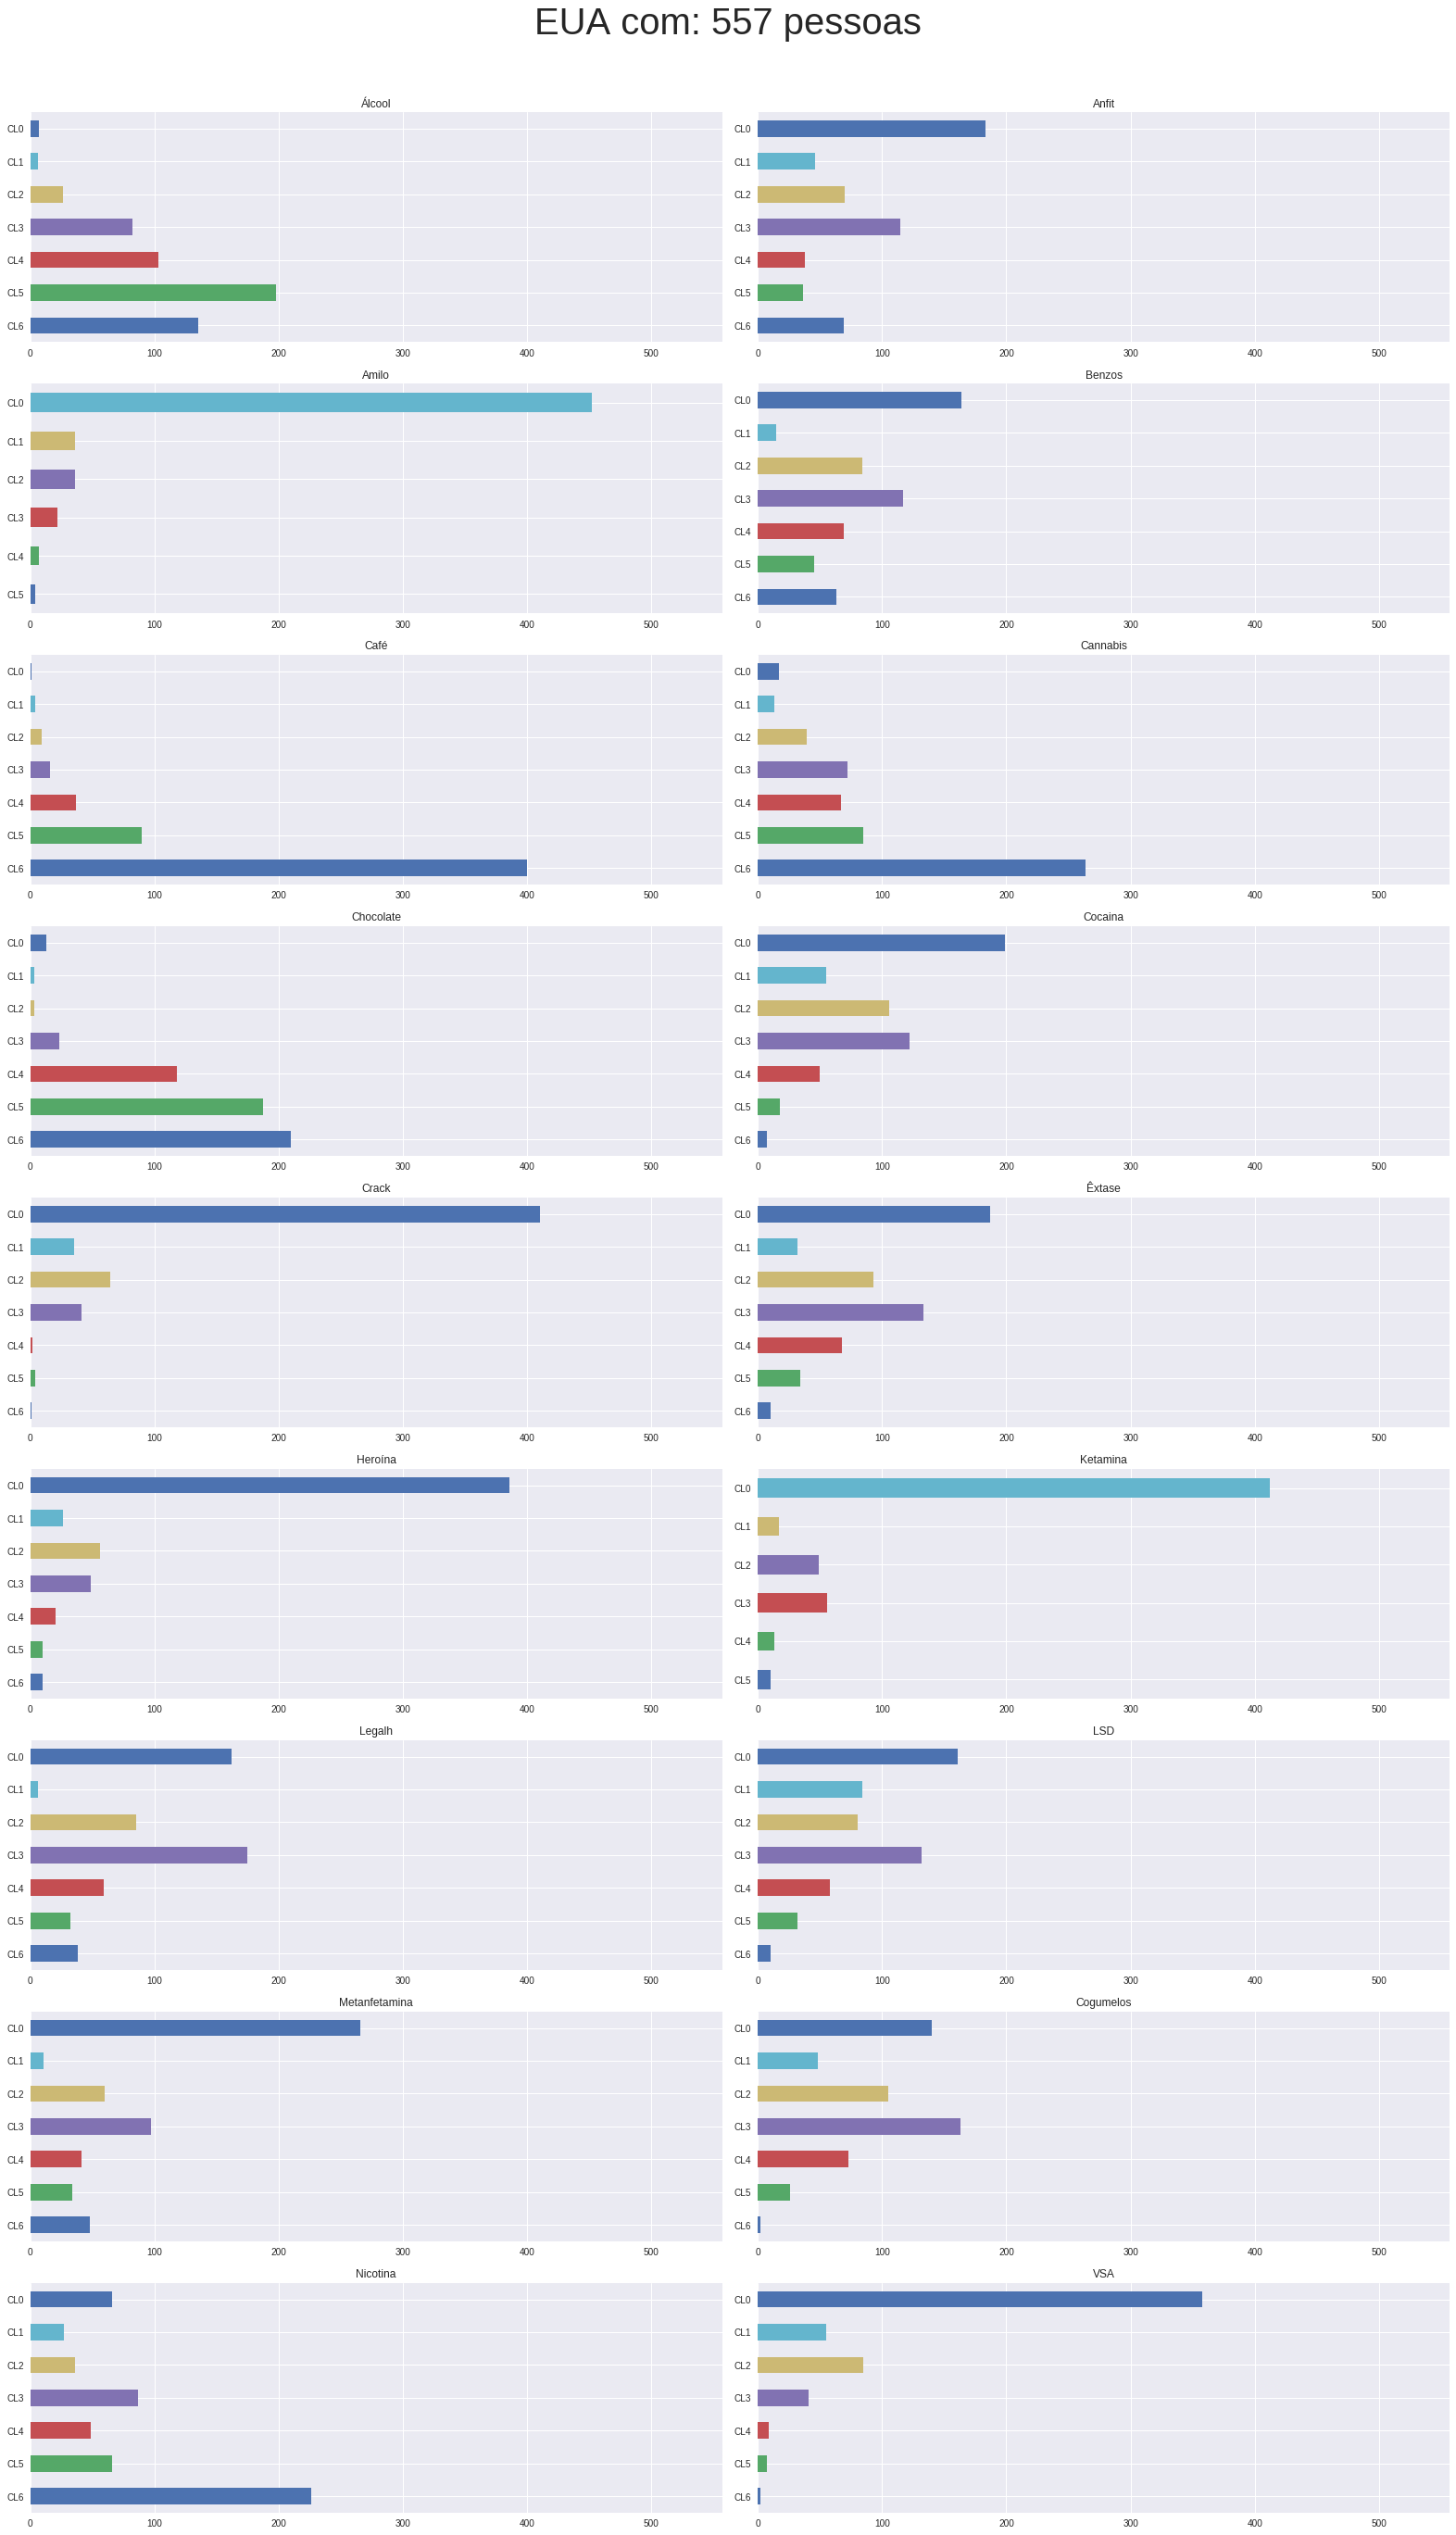

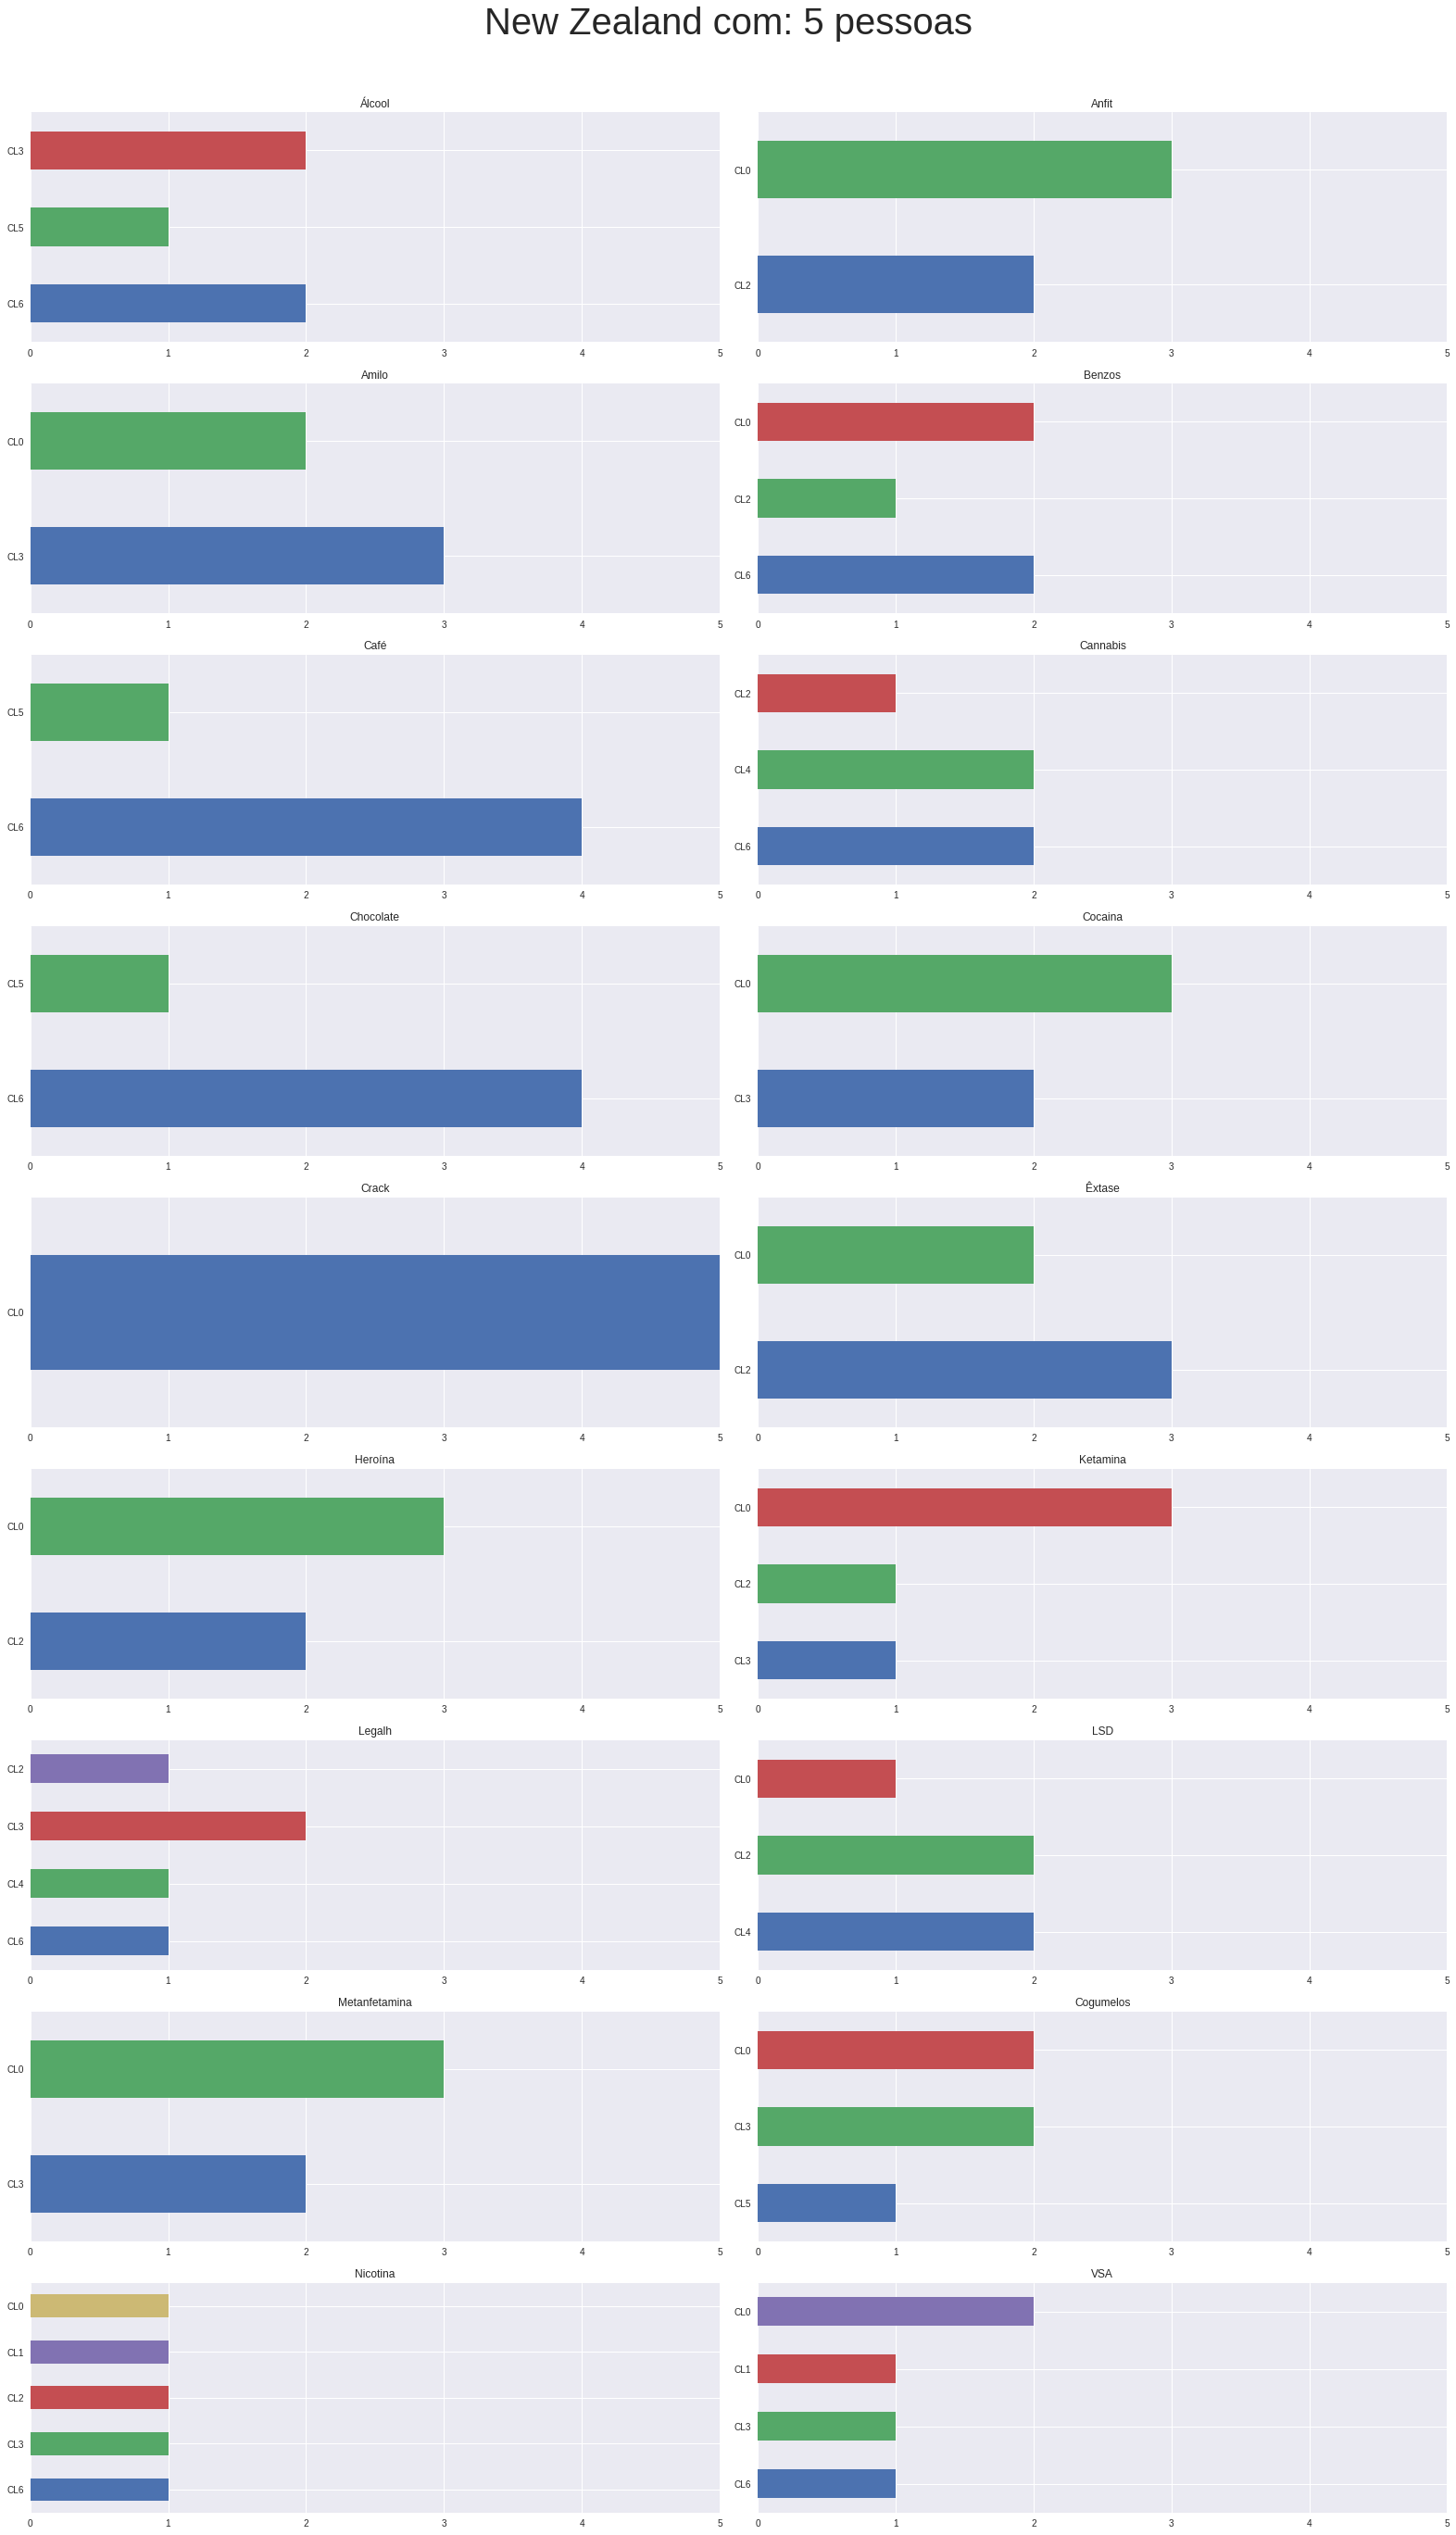

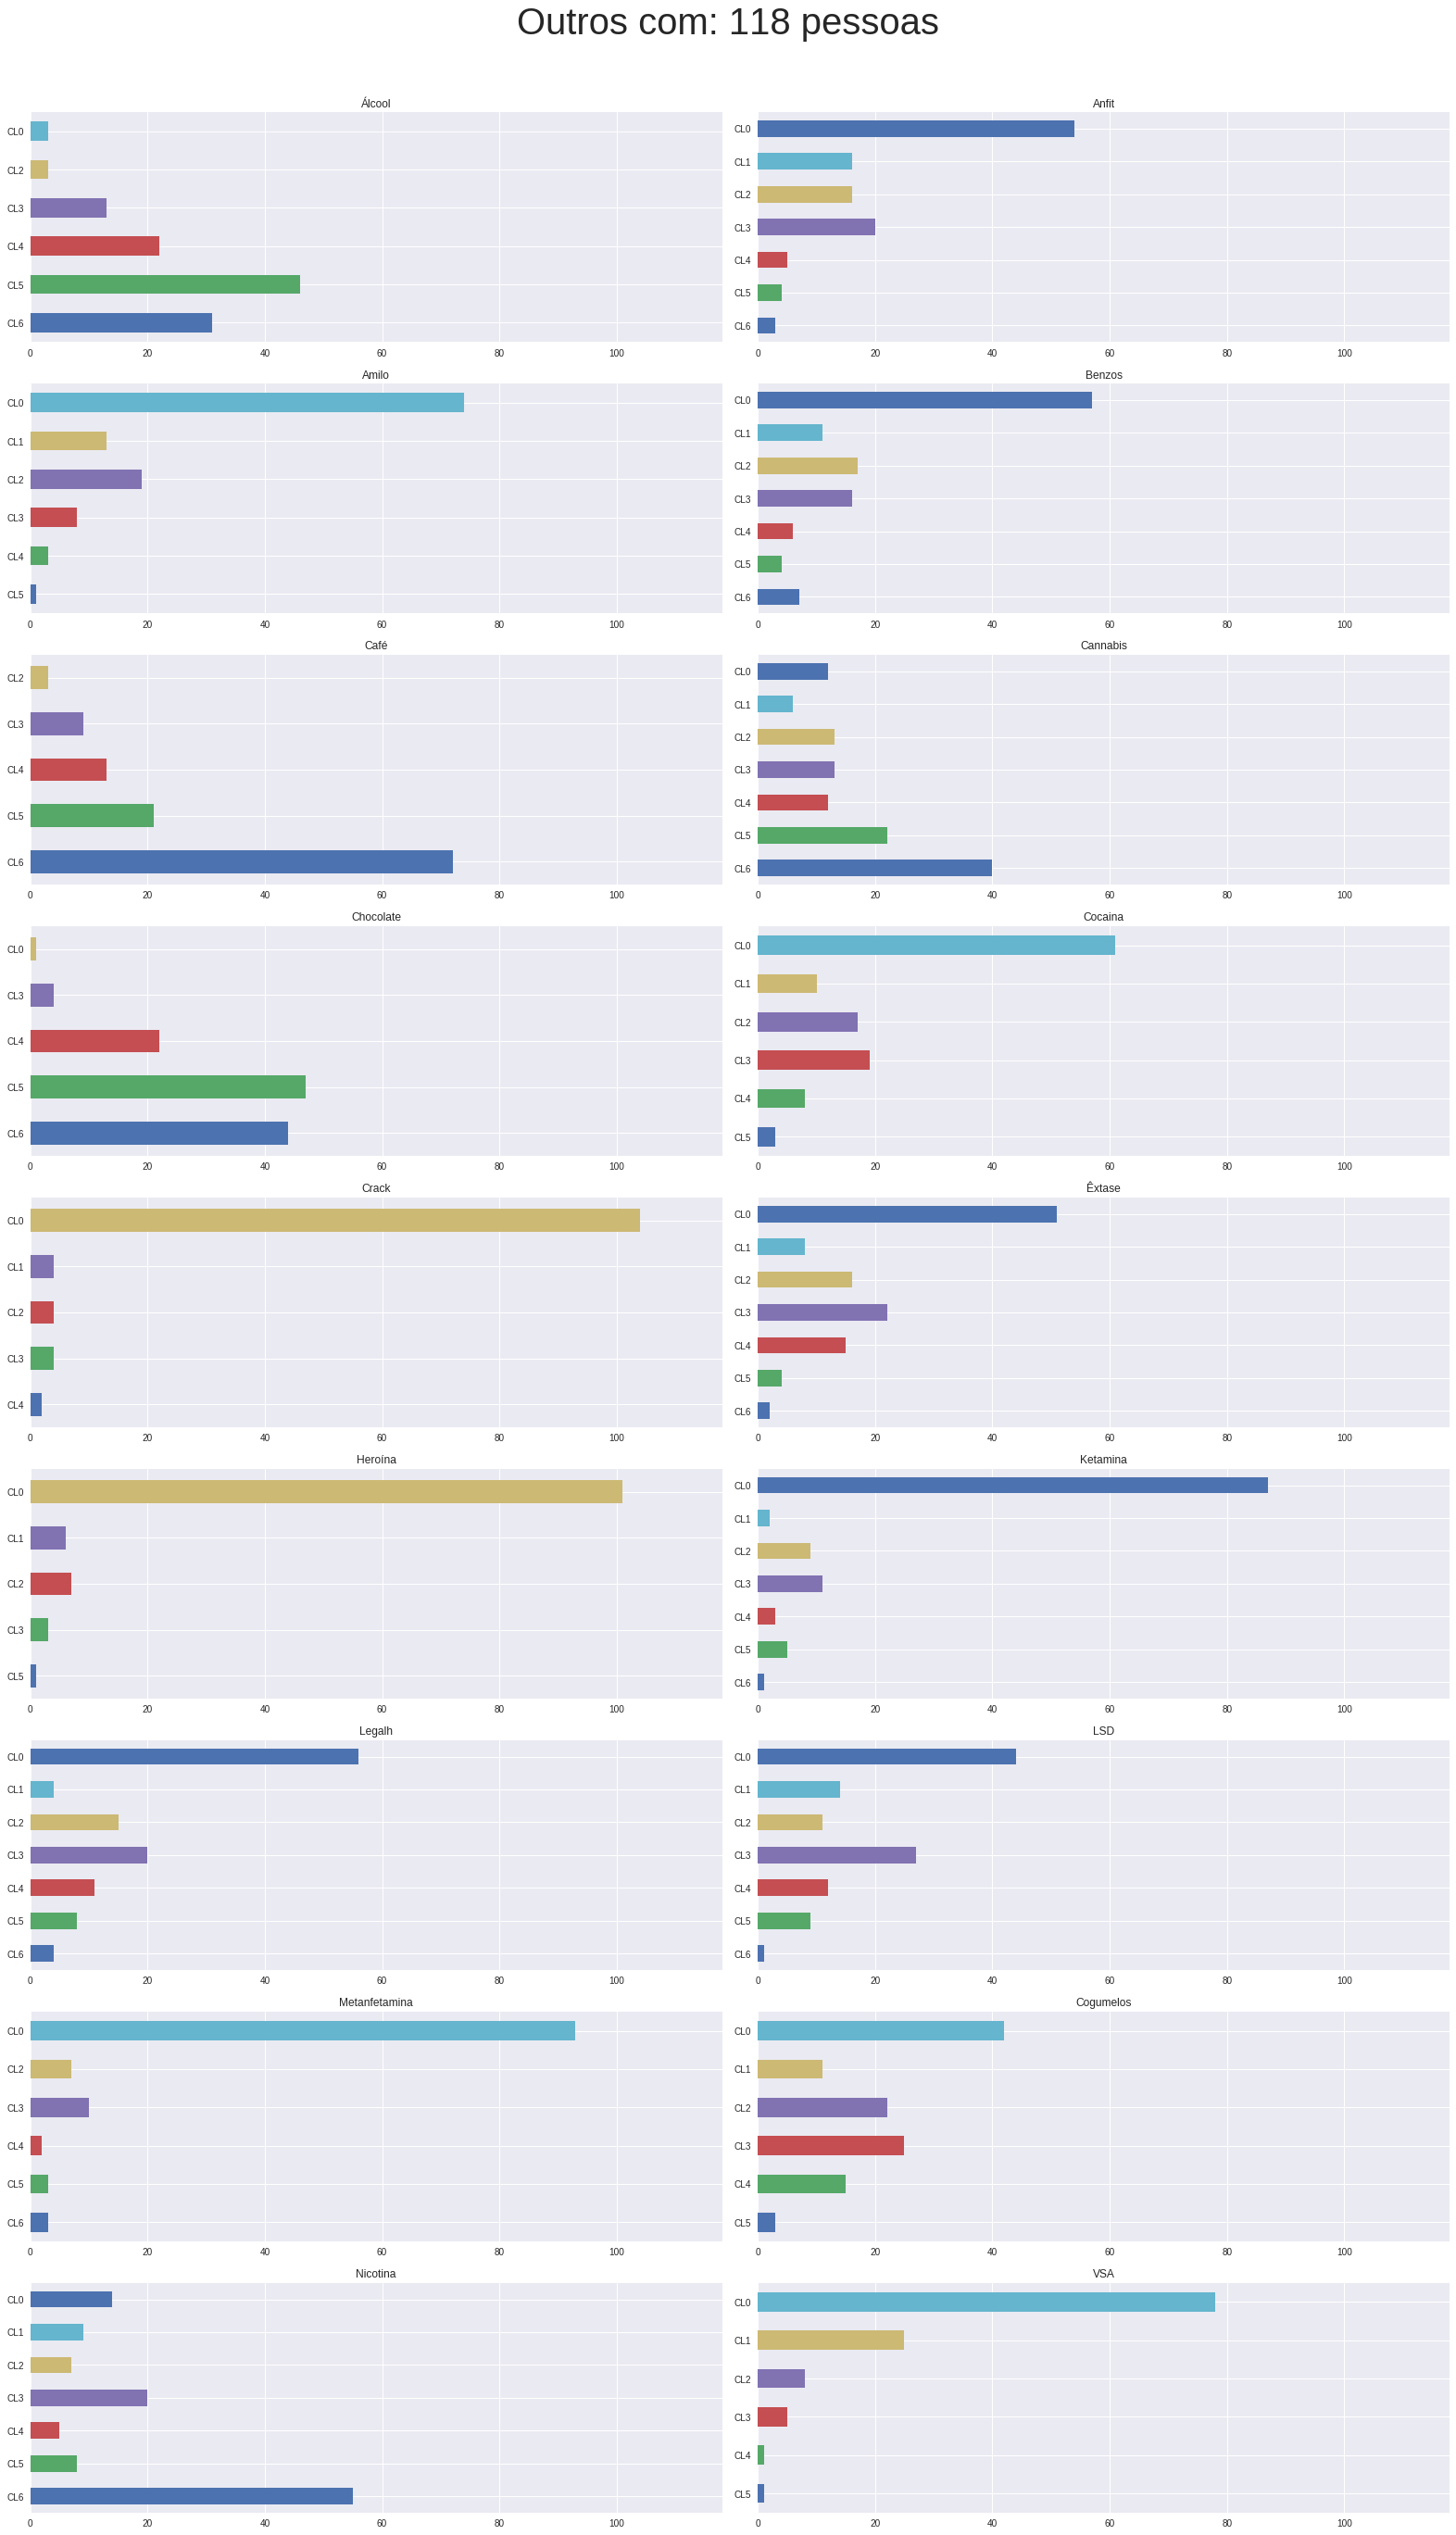

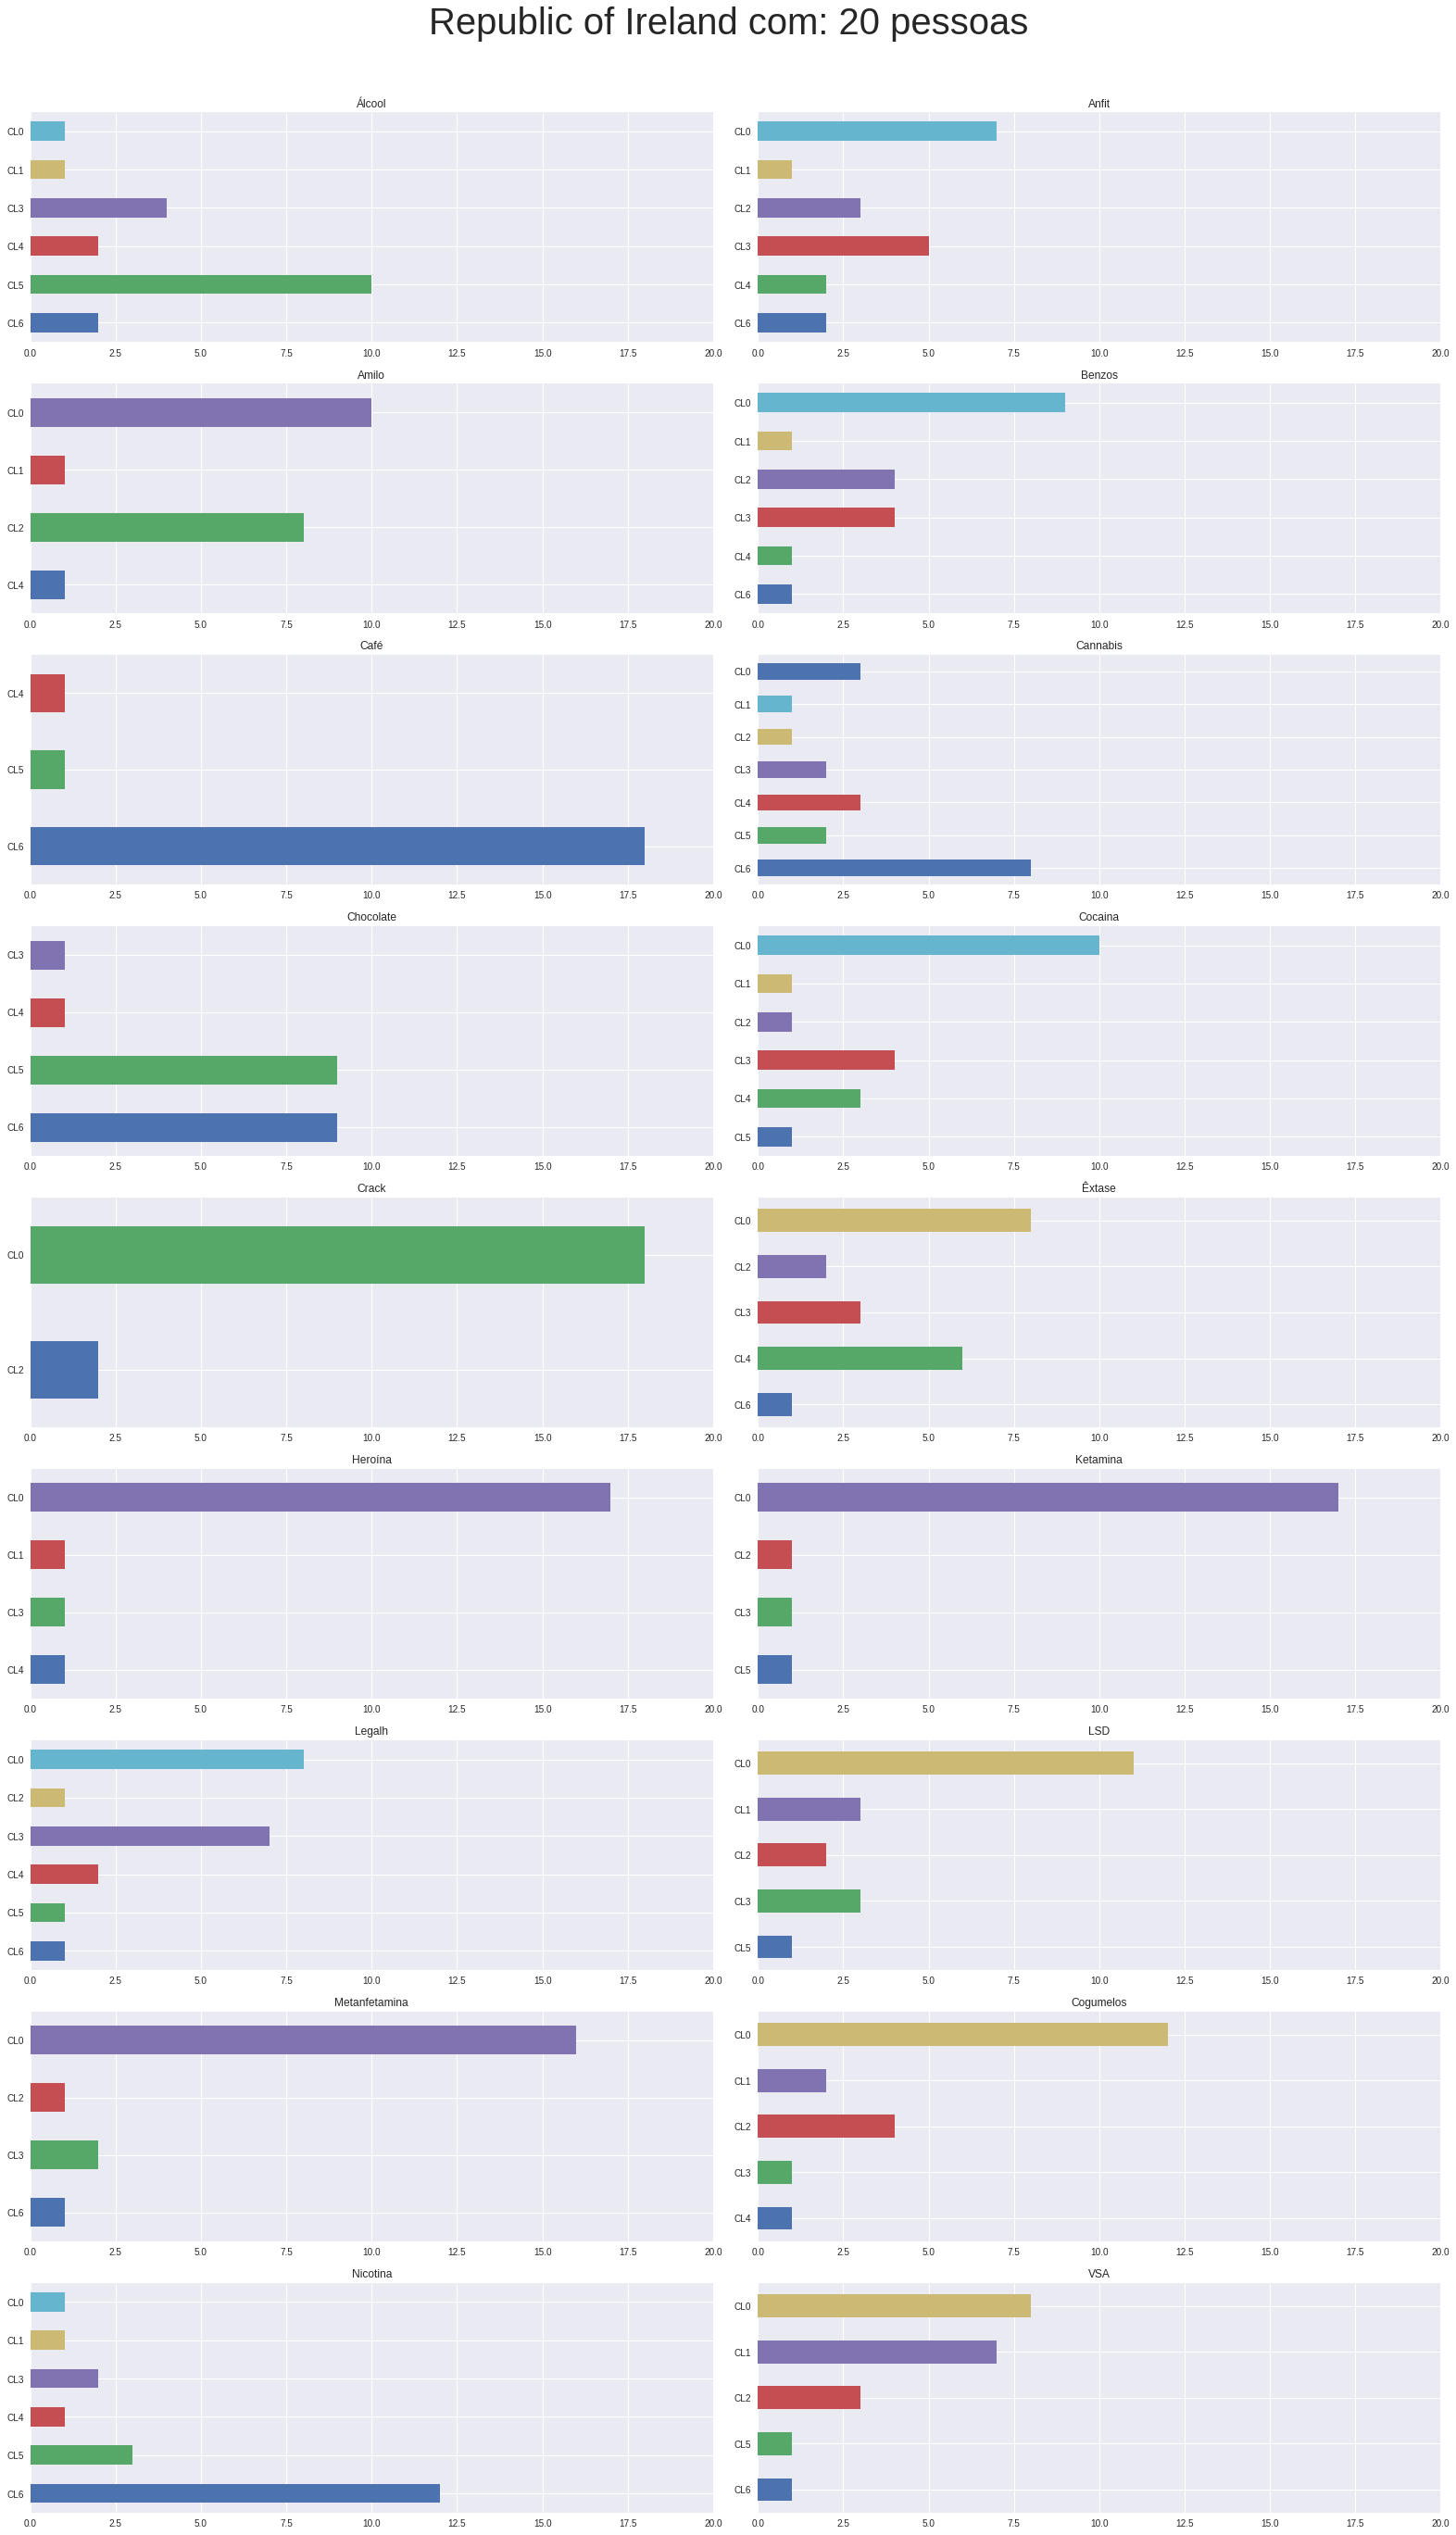

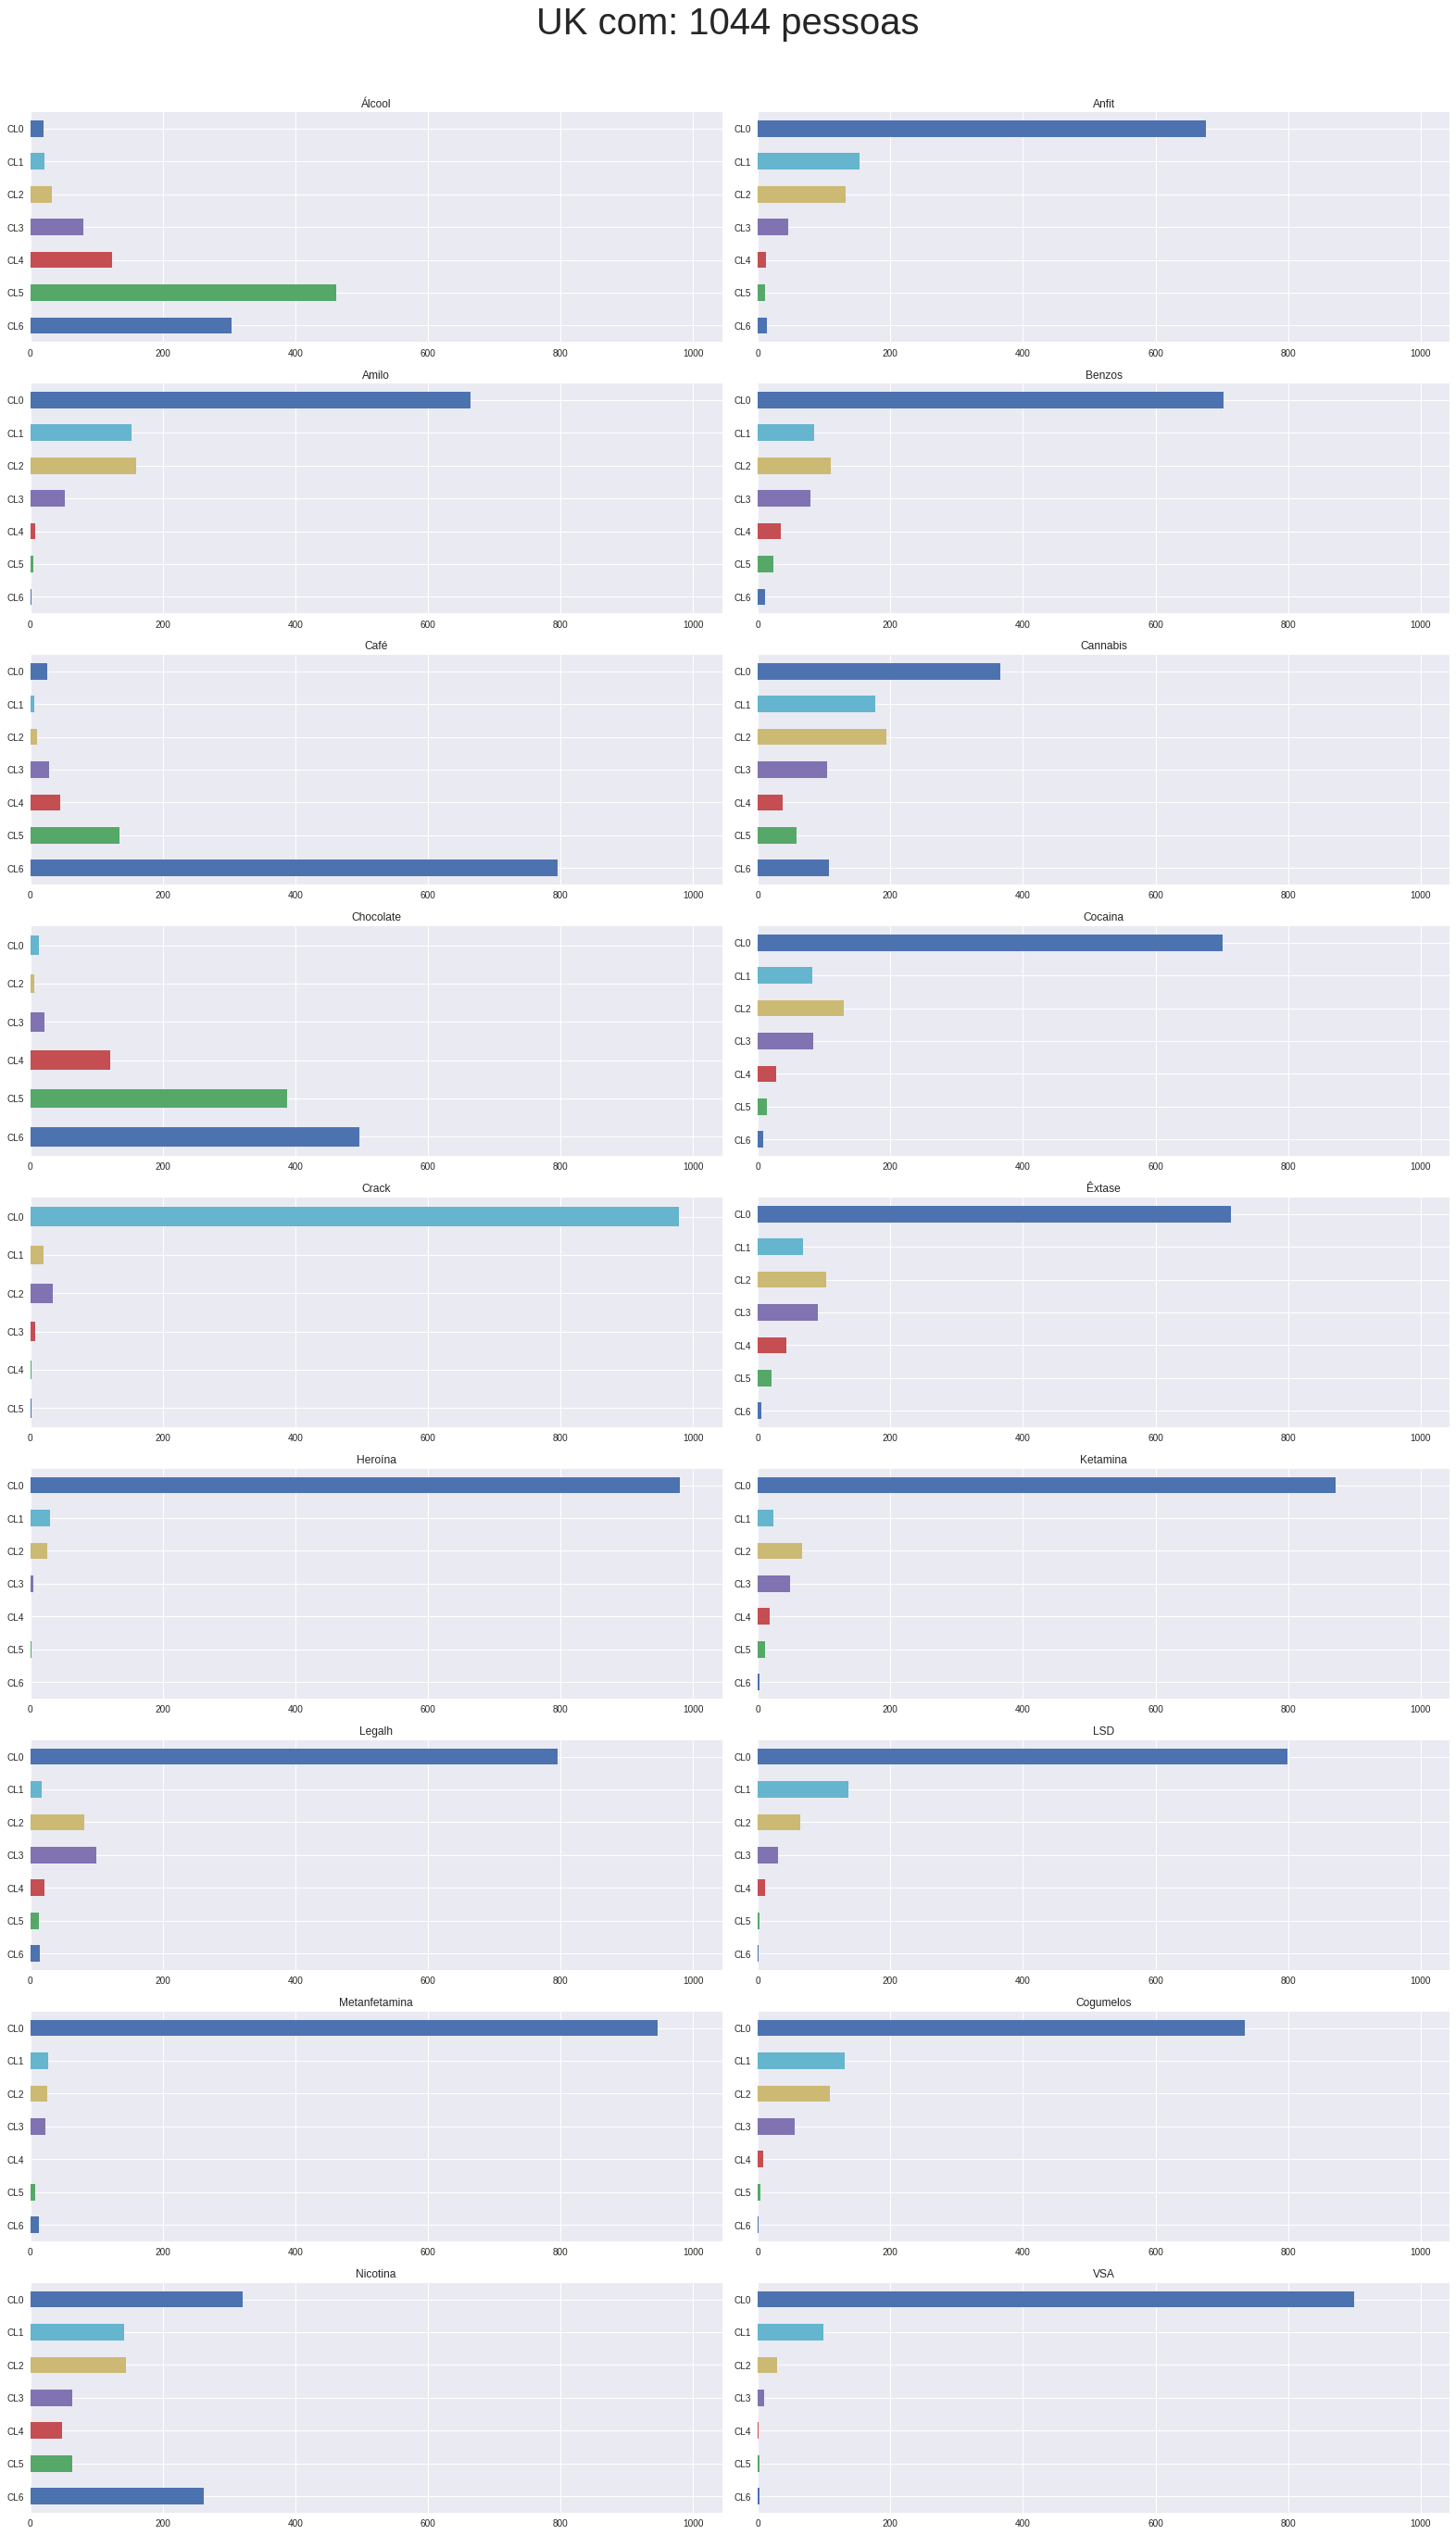

In [10]:
for paises in enumerate(drugs.groupby('País_cat')):
      
  fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(22, 40))
  fig.suptitle(paises[1][0]+" com: "+str(len(paises[1][1]))+" pessoas",fontsize=40)
  
  for indice, columns in enumerate(paises[1][1].select_dtypes('object')):
      paises[1][1][columns].value_counts().sort_index(ascending=False).plot(kind='barh',stacked=True, ax=axes[int(indice/2), indice%2],xlim=(0,len(paises[1][1])),title=perguntas[indice]) #PQ O STACKED NÂO FUNCIONA AAAAAAAAAA
      plt.subplots_adjust(top=0.85)
  
  
  fig.tight_layout(rect=[0, 0.03, 1, 0.95])


## Estatística Básica

1) Present the mean, variance, min, median and max values for each attribute. If the dataset has too many attibutes, choose the more significant ones. Present your code and some remarks to help the understanding

Observamos que a função de desensidade de probabilidade parece que há uma discretização na sensação e impulsividade. Os demais dados numéricos não apresentam tal comportamento. O desvio padrão abaixo dos demais auxíla o entendimento desse comportamento. Como o valores possuem uma intervariância menor, o seu desvio será menor, mas ainda sim alto.

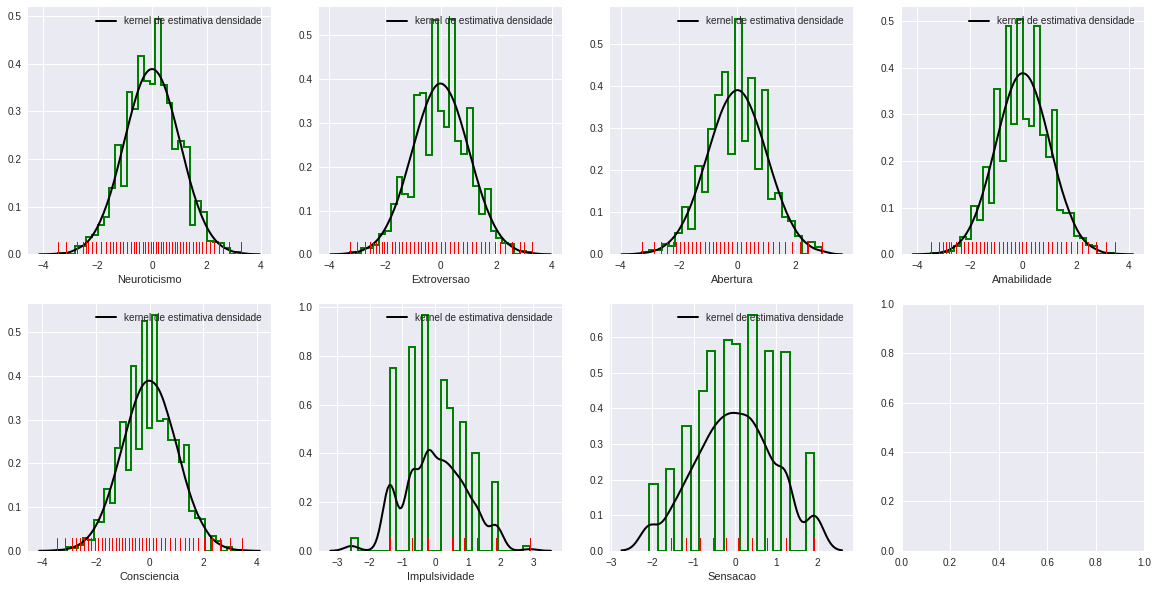

In [11]:

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for indice, validos in enumerate(drugs.select_dtypes('float')):
    
    se.distplot(drugs[validos], kde=True, ax=axes[int(indice/4),indice%4],rug=True, rug_kws={"color": "r"},kde_kws={"color": "k", "lw": 2, "label": "kernel de estimativa densidade"},hist_kws={"histtype": "step", "linewidth": 2,"alpha": 1, "color": "g"})

    

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


,Neuroticismo,Extroversao,Abertura,Amabilidade,Consciencia,Impulsividade,Sensacao
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


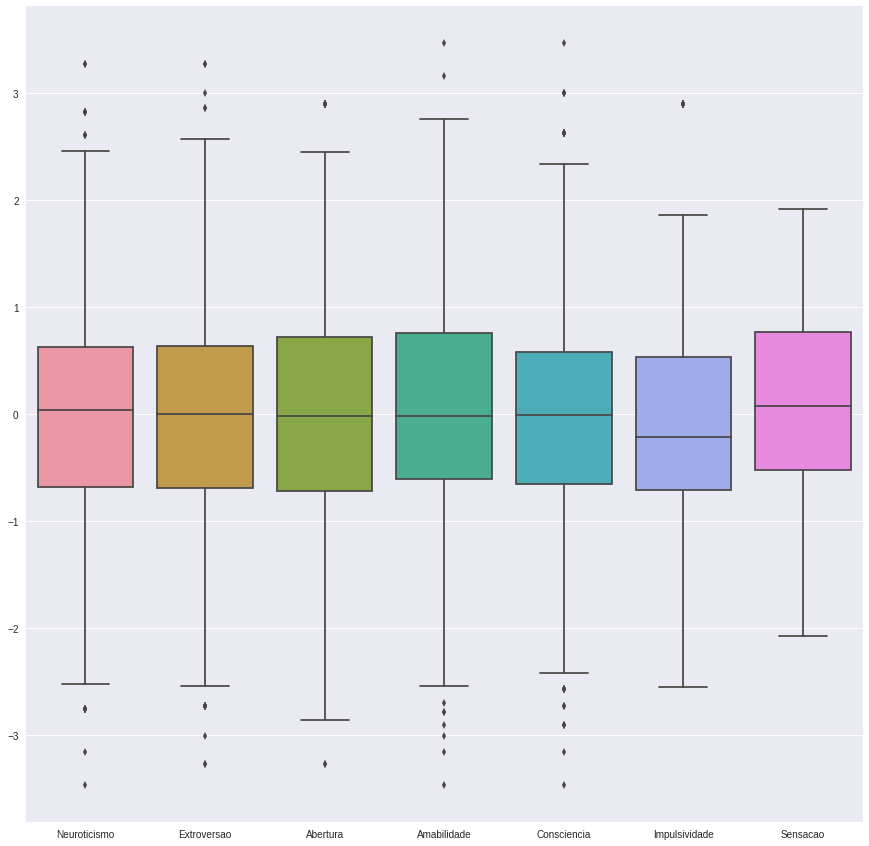

In [12]:
plt.rcParams['figure.figsize'] = [15, 15]

se.boxplot(drugs.select_dtypes('float'))
drugs.describe()

Essa característica de discretização mostrada no histograma irá aparecer com a falta de outliers no conjunto de sensação. O não comportamento guassiano evidente auxilia nessa análise. Realizando uma busca no artigo original, temos que esse valores são em discretizados que forma normalizados.

In [13]:
drugs

,Idade,Genero,Educação,Etnia,Neuroticismo,Extroversao,Abertura,Amabilidade,Consciencia,Impulsividade,...,Êxtase,Heroína,Ketamina,Legalh,LSD,Metanfetamina,Cogumelos,Nicotina,VSA,País_cat
0,0.49788,0.48246,-0.05921,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,UK
1,-0.07854,-0.48246,1.98437,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,UK
2,0.49788,-0.48246,-0.05921,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,UK
3,-0.95197,0.48246,1.16365,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,UK
4,0.49788,0.48246,1.98437,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,UK
5,2.59171,0.48246,-1.22751,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,Canada
6,1.09449,-0.48246,1.16365,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,EUA
7,0.49788,-0.48246,-1.73790,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,UK
8,0.49788,0.48246,-0.05921,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,Canada
9,1.82213,-0.48246,1.16365,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,UK


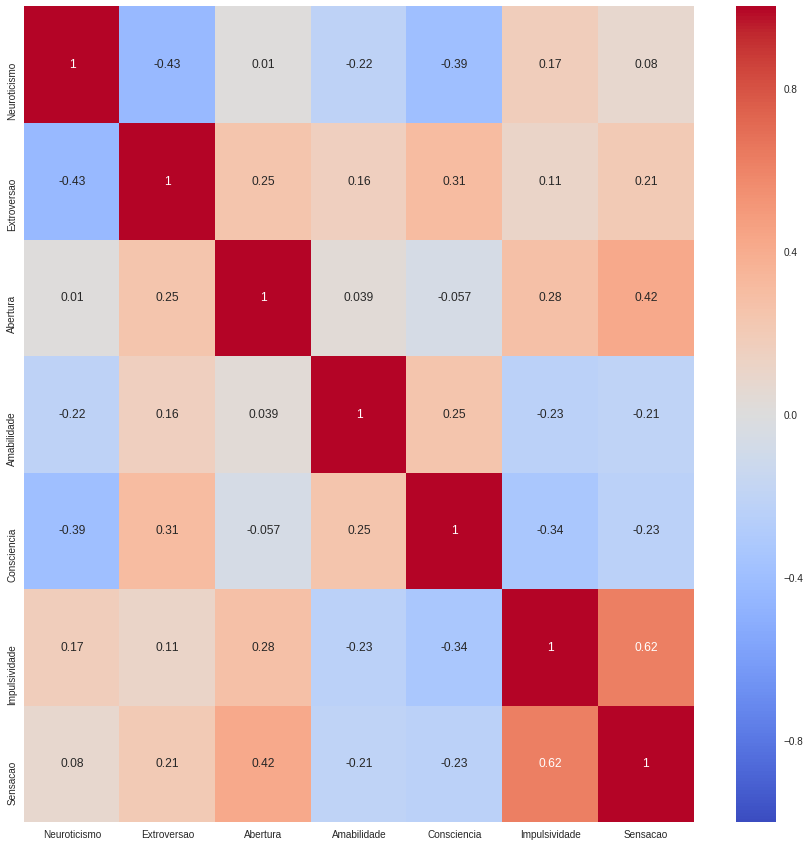

In [14]:
se.heatmap(drugs.corr(), cmap='coolwarm',annot=True)

Correlações baixas, mas que chamam a atenação por estarem no $\min$ e no $\max$, a relação Extrovertido e Neuroticismo (inversamente correlacionada); Impulsividade e Sensação. Neuroticismo e Consciencia.

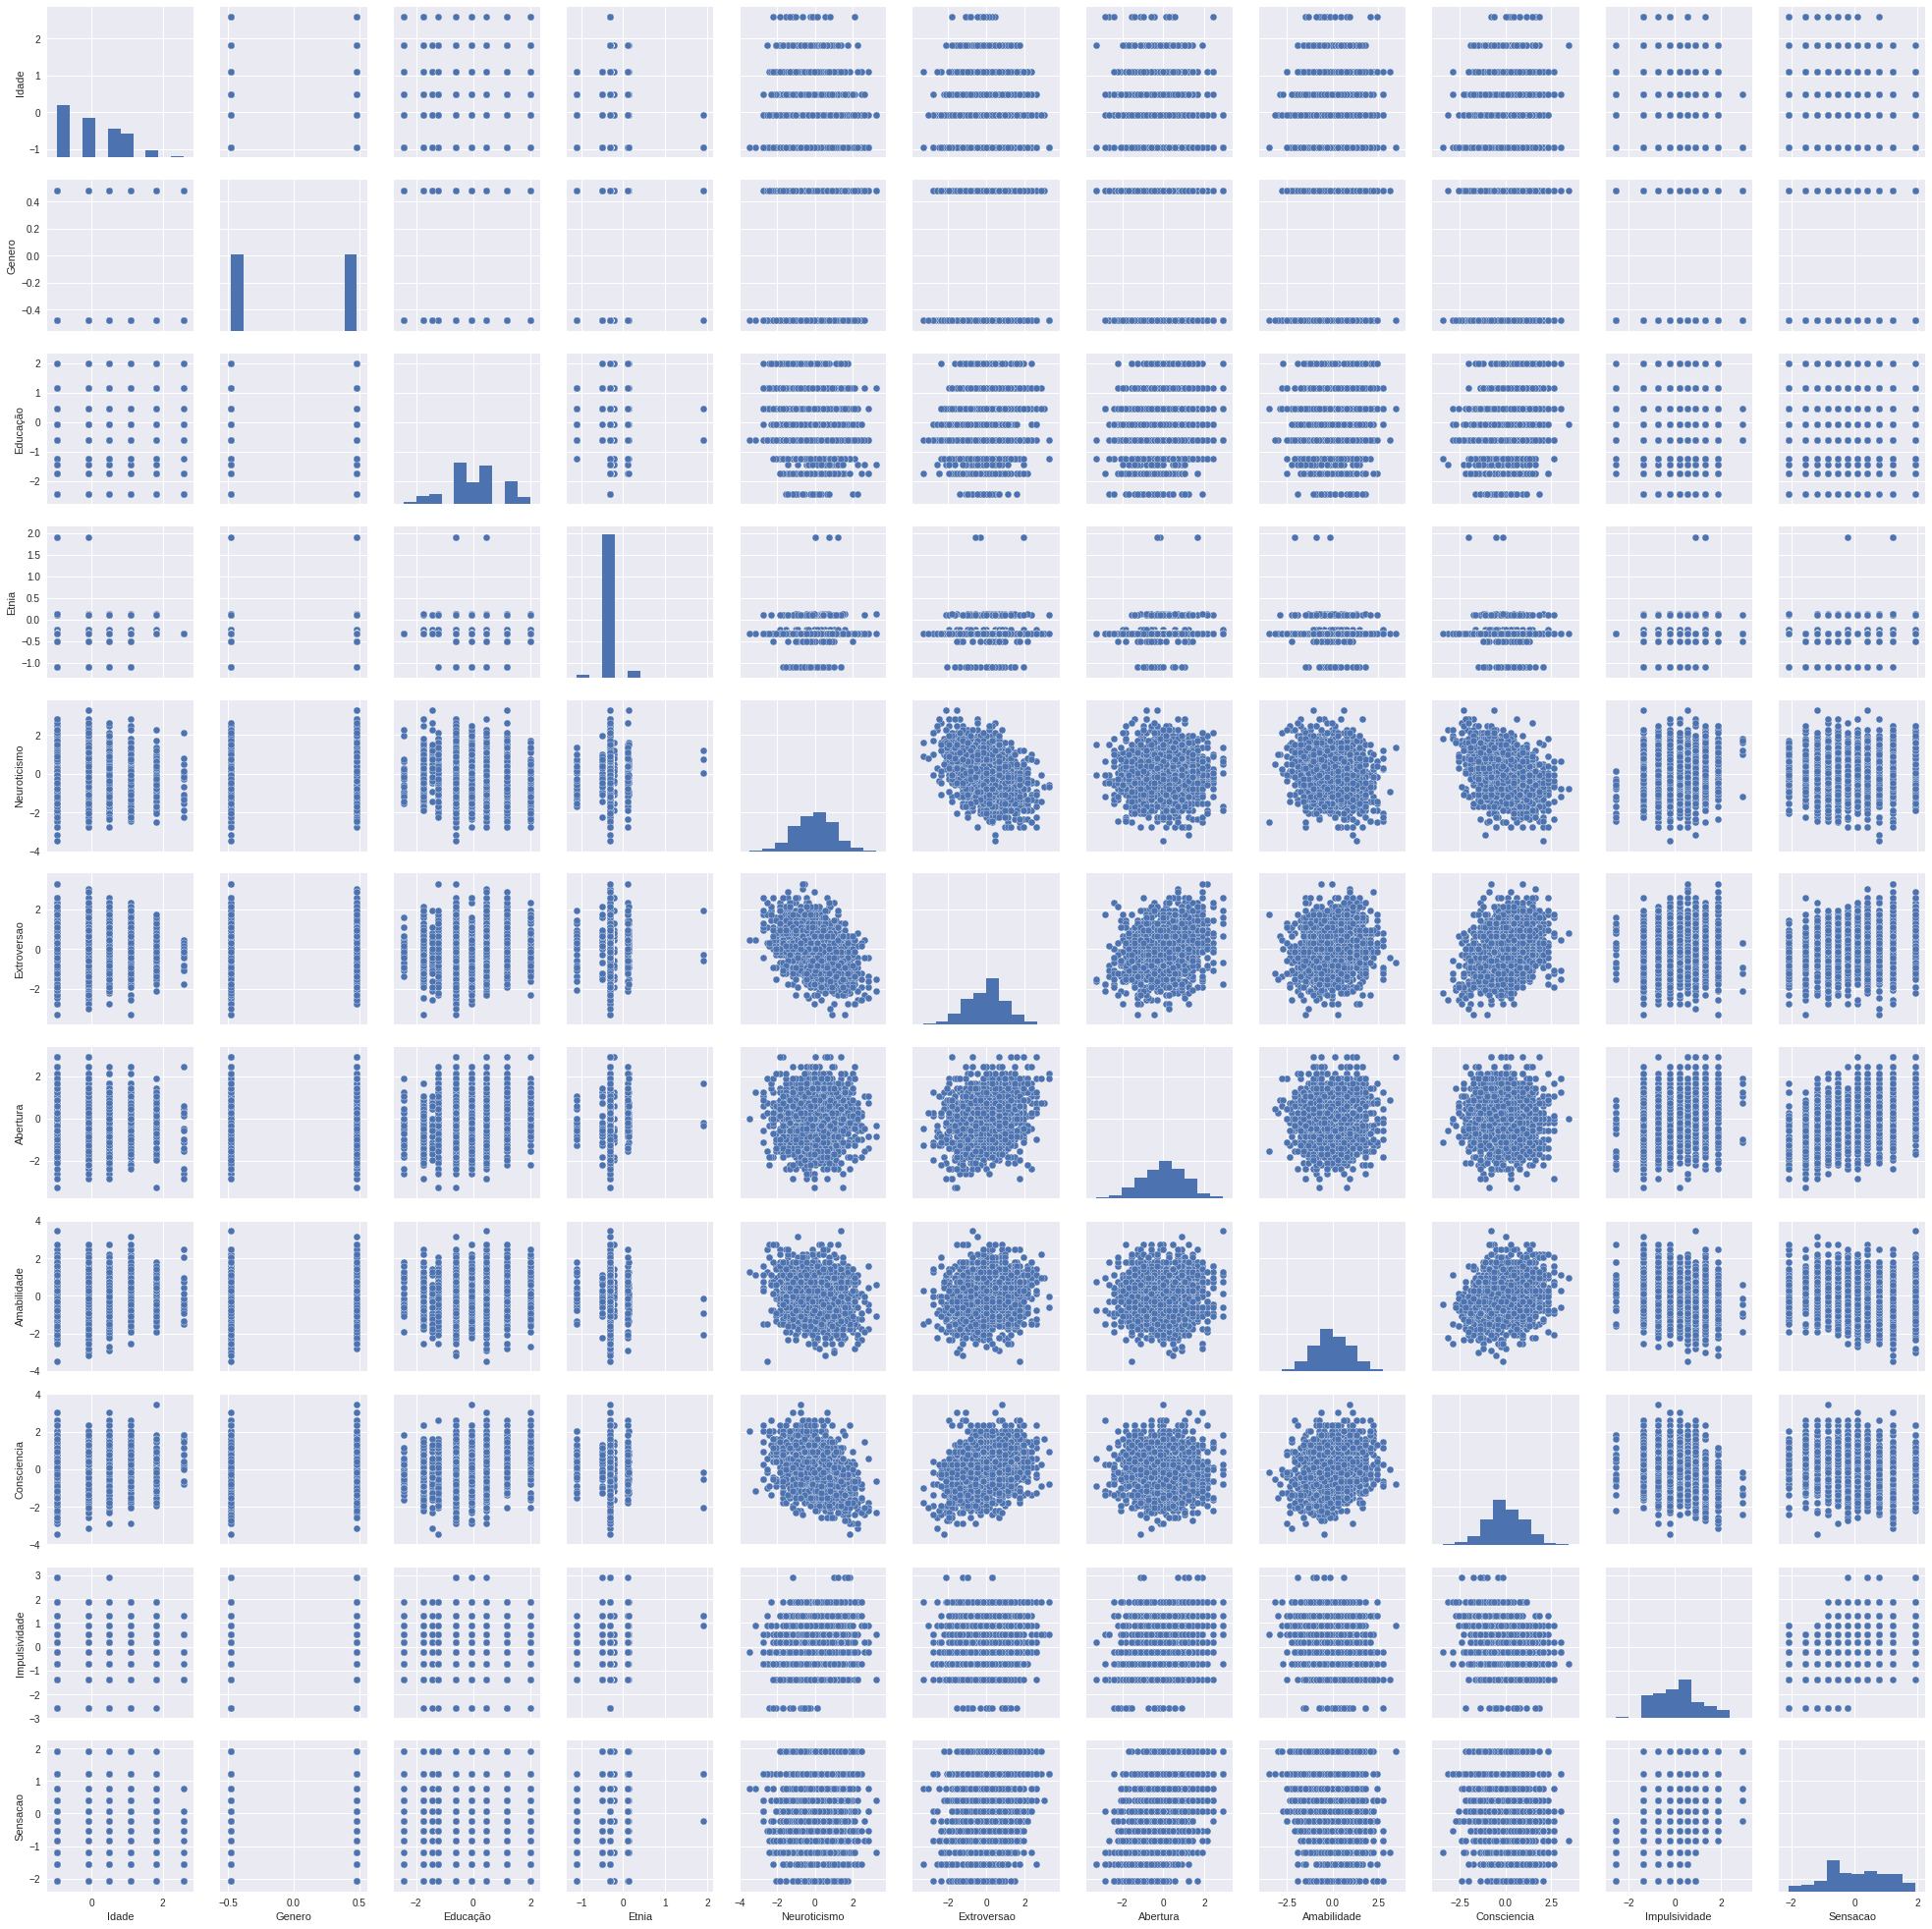

In [15]:
se.pairplot(drugs)

Os dados categóricos não são bem represetando nesse gênero de visualização, para isso, empregramos a scatter matrix do sklearn que lida com valores numerico diretamente.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccda45af60>,
      dtype=object)

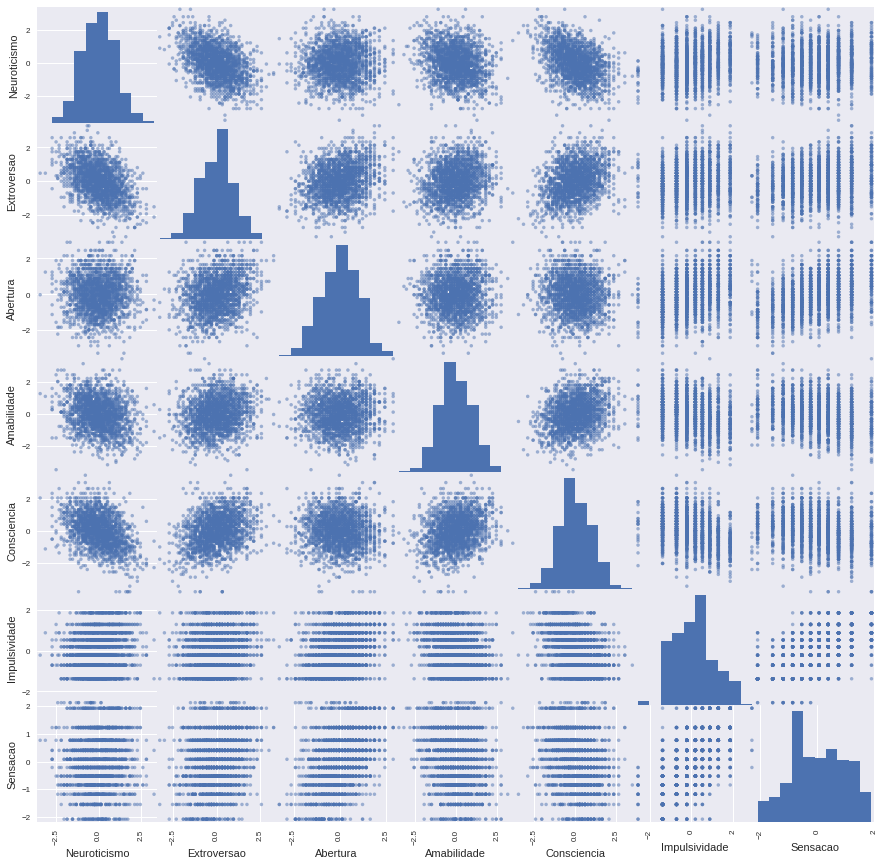

In [16]:
plt.rcParams['figure.figsize'] = [20, 20]
scatter_matrix(drugs)

Quais são os agrupamentos presentes no itens numericos? Isto é, nos testes de personalidade. Há uma discretização em impulsividade e Sensação, talvez seja interessante mudar a categoria desse atributo. No entato, segundo o artigo, esse são valores numéricos não categóricos (no meu entendimento, posso estar errado)

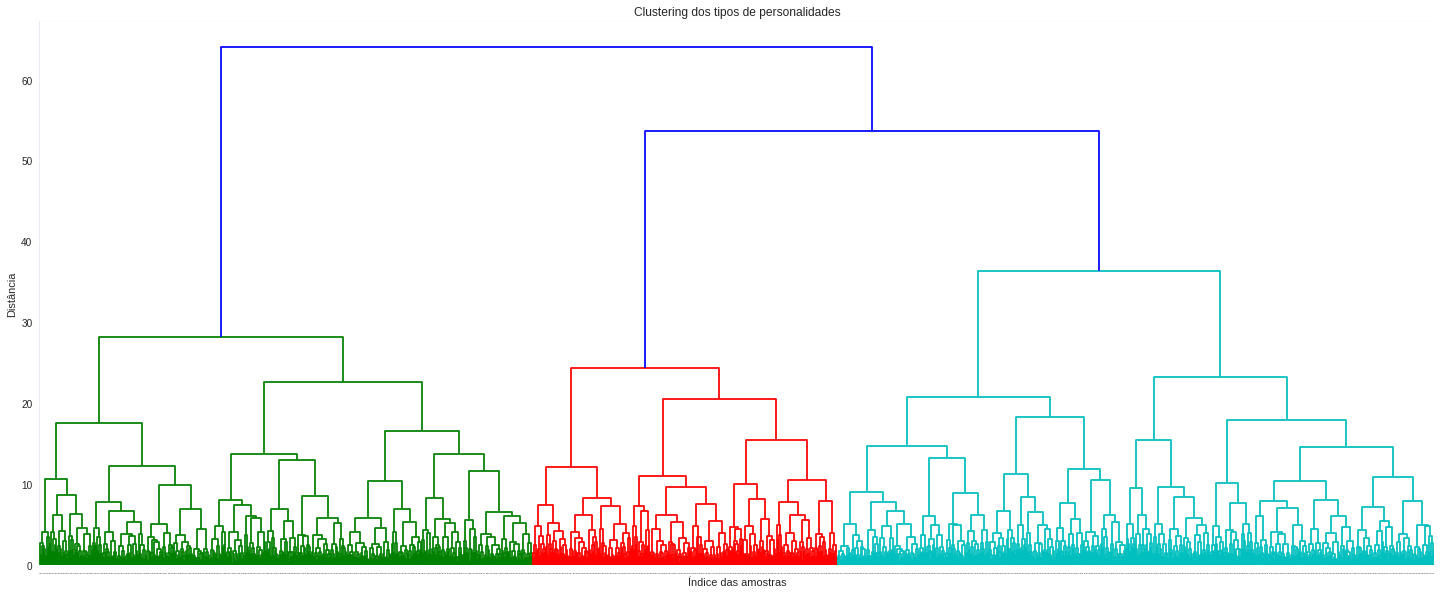

Neuroticismo
Extroversao
Abertura
Amabilidade
Consciencia
Impulsividade
Sensacao


In [17]:
LinkageWE = linkage(drugs.select_dtypes('float'), method='ward')

plt.figure(figsize=(25, 10))
plt.title('Clustering dos tipos de personalidades')
plt.xlabel('Índice das amostras')
plt.ylabel('Distância')
SE = dendrogram(LinkageWE,leaf_rotation=0.0,leaf_font_size=1)
plt.show()

for indice, coluna in enumerate(drugs.select_dtypes('float')):
  print(coluna)






# **Questão: Quais são os agrupamentos de escolaridade?**



Iremos verificar o quão coerente está os agrupamentos de escolaridade por traços de personalidade. Já temos nosso $Y$ e buscaremos pelos métodos de agrupamento avaliar essa categoria.

In [0]:
X = drugs.select_dtypes('float')

y = drugs['Educação']
X = StandardScaler().fit_transform(X)


Não encontramos agrupamentos relacionados à personalidade dado a escolaridade, com PCA.

In [20]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

print(sum(pca.explained_variance_ratio_))

len(y.value_counts())




0.8034615647275047


9

In [0]:
f = pd.DataFrame(X_pca)

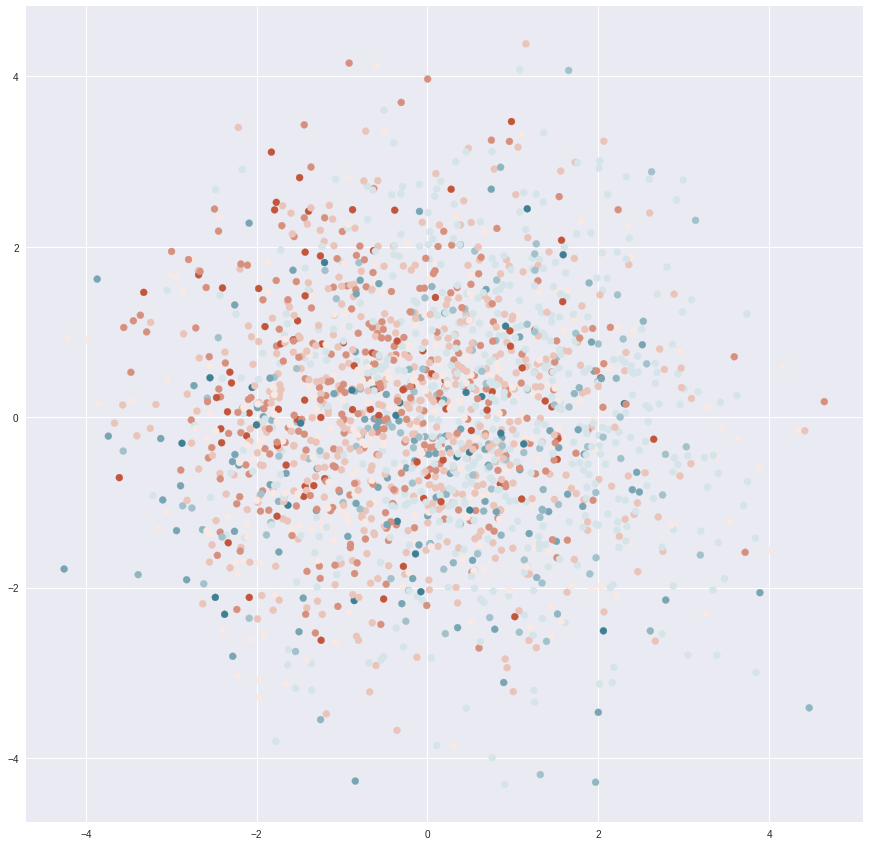

In [22]:
cmap = se.diverging_palette(220, 20, sep=9, as_cmap=True)

plt.scatter(x=f[0], y = f[1], c=y,cmap=cmap)

A leitura é que nenhum dos compenentes explica em totalidade o comporatento das medidas, isto é, as medidas apresentam comportamentos de variáveis aleatórais distintas. Algo totalmente coerente com a baixa explicação das componentes.


In [0]:
k_means = KMeans(init='k-means++', n_clusters=9, n_init=100)

k_means.fit(X)

k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

n_clusters = len(k_means.cluster_centers_)

In [0]:
y_true = pd.DataFrame(y).apply(LabelEncoder().fit_transform)

In [48]:
precision_score(y_true,k_means_labels, average='weighted')


0.2018477889906484

Péssimos resultados para essa abordagem.

# ** Quais as possíveis relações entre o consumo de diferentes tipos de drogas?**



In [0]:

uso_drogas = drugs.select_dtypes('object')

encodeDrugs = uso_drogas.apply(LabelEncoder().fit_transform)


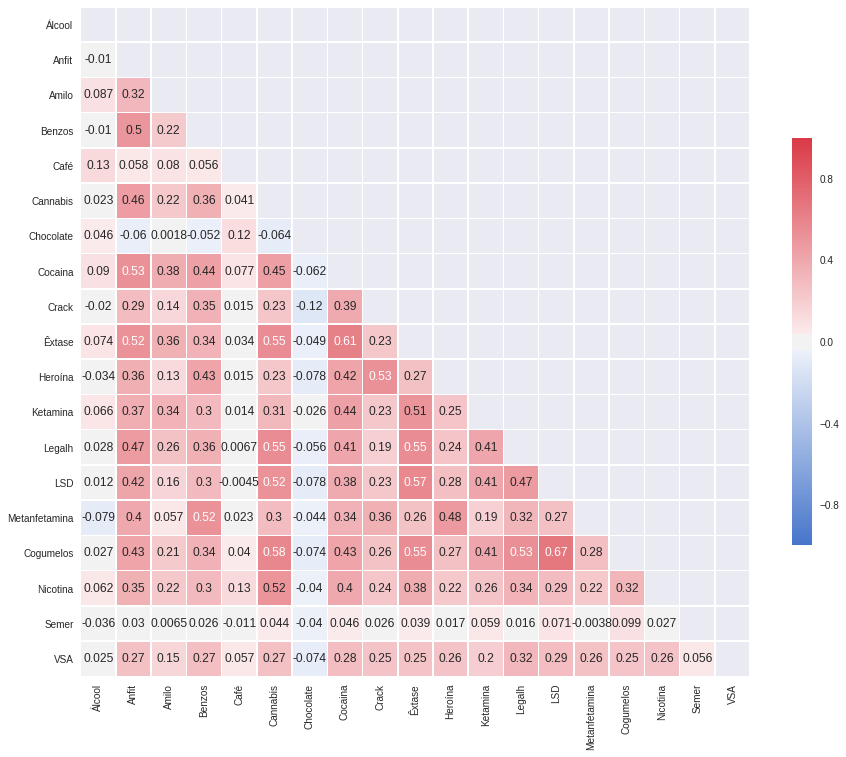

In [210]:
corr = encodeDrugs.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = se.diverging_palette(255, 10, as_cmap=True)

se.heatmap(corr, mask=mask, cmap=cmap, annot=True, center=0, vmax = 1.0, square=True, linewidths=.5, cbar_kws={"shrink": .5})


Retirado de https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

In [0]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_abs_correlations(df, n=5, ascending=False):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=ascending)
    return au_corr[0:n]

Somente através da correlação, verificamos algumas relações imporantes. A distribuição de respostas relacionada ao LSD e os Cogumelos estão correlacionados (próximos) entre si. Isso é, uma pessoa tende a responder com o mesmo padrão de resposta.

# **Quais são as dez drogas menos correlacionadas entre si:**

---

Lembrando que correlação não implica em casualidade, e que a proximidade pode ter ocorrido dado na codificação das categorias para valores numéricos:


In [207]:
get_abs_correlations(encodeDrugs,n=10, ascending = True)

Amilo          Chocolate    0.001838
Metanfetamina  Semer        0.003798
Café           LSD          0.004510
Amilo          Semer        0.006498
Café           Legalh       0.006747
Álcool         Anfit        0.009988
               Benzos       0.010229
Café           Semer        0.011084
Álcool         LSD          0.012123
Café           Ketamina     0.013997
dtype: float64

Dessa forma, temos nas respostas dos questionários sobre o uso de drogas, temos que as dez respostas mais correlacionadas são as seguintes:

In [208]:
get_abs_correlations(encodeDrugs,n=10, ascending = False)

LSD       Cogumelos    0.668627
Cocaina   Êxtase       0.610783
Cannabis  Cogumelos    0.579934
Êxtase    LSD          0.570946
          Legalh       0.554134
Cannabis  Legalh       0.554048
          Êxtase       0.552978
Êxtase    Cogumelos    0.547536
Legalh    Cogumelos    0.531819
Anfit     Cocaina      0.530951
dtype: float64

# É interessante observar que as 5 primeiras drogas, com padrão de resposta mais correlacionado entre si, são todas de natureza alucinógenas ou estimulantes. Essa correlação não é adequada para dados categoricos, mas pode ser servir como uma intuição.